In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

from vivarium import Artifact

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import PercentFormatter


!date
!whoami
!pwd

Mon Dec  1 09:34:26 PST 2025
tylerdy
/mnt/share/homes/tylerdy/vivarium_research_alzheimers/plots


In [2]:
VAL_COLS = ["Mean", "95% UI Lower", "95% UI Upper"]
UI_COLS = ["95% UI Lower", "95% UI Upper"]
AGES = [
    "25_to_59",
    "60_to_64",
    "65_to_69",
    "70_to_74",
    "75_to_79",
    "80_to_84",
    "85_to_89",
    "90_to_94",
    "95_plus",
]

In [3]:
results_dir_old = "/snfs1/Project/simulation_science/alzheimers/results_10_31_2025"
results_dir_v1 = (
    "/snfs1/Project/simulation_science/alzheimers/results_in_progress/version1"
)
results_dir_v2 = (
    "/snfs1/Project/simulation_science/alzheimers/results_in_progress/version2"
)
results_dir_new = "/snfs1/Project/simulation_science/alzheimers/results_in_progress"
inc = pd.read_csv(Path(results_dir_new) / "incidence.csv")
prev = pd.read_csv(Path(results_dir_new) / "prevalence.csv")
deaths = pd.read_csv(Path(results_dir_new) / "deaths.csv")
res = pd.concat([prev, inc, deaths])
v2_res = pd.concat(
    [
        pd.read_csv(Path(results_dir_v2) / "prevalence.csv"),
        pd.read_csv(Path(results_dir_v2) / "incidence.csv"),
        pd.read_csv(Path(results_dir_v2) / "deaths.csv"),
    ]
)
res

Year                  Location       Age     Sex   Disease Stage  \
0       2025                    Brazil  60_to_64  Female  Preclinical AD   
1       2025                    Brazil  60_to_64    Male  Preclinical AD   
2       2025                    Brazil  60_to_64    Both  Preclinical AD   
3       2025                    Brazil  60_to_64  Female  Preclinical AD   
4       2025                    Brazil  60_to_64    Male  Preclinical AD   
...      ...                       ...       ...     ...             ...   
364795  2100  United States of America   60_plus    Male     AD Dementia   
364796  2100  United States of America   60_plus    Both     AD Dementia   
364797  2100  United States of America   60_plus  Female     AD Dementia   
364798  2100  United States of America   60_plus    Male     AD Dementia   
364799  2100  United States of America   60_plus    Both     AD Dementia   

                          Scenario                            Measure  Metric  \
0                        Reference                         Prevalence  Number   
1                        Reference                         Prevalence  Number   
2                        Reference                         Prevalence  Number   
3                BBBM Testing Only                         Prevalence  Number   
4                BBBM Testing Only                         Prevalence  Number   
...                            ...                                ...     ...   
364795           BBBM Testing Only  Averted Deaths Associated with AD    Rate   
364796           BBBM Testing Only  Averted Deaths Associated with AD    Rate   
364797  BBBM Testing and Treatment  Averted Deaths Associated with AD    Rate   
364798  BBBM Testing and Treatment  Averted Deaths Associated with AD    Rate   
364799  BBBM Testing and Treatment  Averted Deaths Associated with AD    Rate   

                Mean  95% UI Lower   95% UI Upper  
0       50379.538541  34408.455116   68531.734403  
1       23439.013369  16398.874904   33885.724789  
2       73818.551910  50807.330021  102419.407173  
3       50379.538541  34408.455116   68531.734403  
4       23439.013369  16398.874904   33885.724789  
...              ...           ...            ...  
364795      0.000000      0.000000       0.000000  
364796      0.000000      0.000000       0.000000  
364797      0.000053      0.000035       0.000069  
364798      0.000029      0.000019       0.000037  
364799      0.000042      0.000028       0.000054  

[1678080 rows x 11 columns]

In [4]:
display(
    res.query(
        "Year == 2065 & Location == 'United States of America' & Age == '75_to_79' & Sex == 'Female' & `Disease Stage` == 'AD Dementia' & Scenario == 'Reference' & Measure == 'Prevalence' & Metric == 'Number'"
    )
)
display(
    v2_res.query(
        "Year == 2065 & Location == 'United States of America' & Age == '75_to_79' & Sex == 'Female' & `Disease Stage` == 'AD Dementia' & Scenario == 'Reference' & Measure == 'Prevalence' & Metric == 'Number'"
    )
)

Year                  Location       Age     Sex Disease Stage  \
163512  2065  United States of America  75_to_79  Female   AD Dementia   

         Scenario     Measure  Metric           Mean   95% UI Lower  \
163512  Reference  Prevalence  Number  298670.943703  277521.905124   

         95% UI Upper  
163512  316415.902332

Year                  Location       Age     Sex Disease Stage  \
299666  2065  United States of America  75_to_79  Female   AD Dementia   

         Scenario     Measure  Metric           Mean   95% UI Lower  \
299666  Reference  Prevalence  Number  298670.943703  277521.905124   

         95% UI Upper  
299666  316415.902332

In [5]:
# Check 2099 vs 2100 data
display(
    res[
        (res["Year"] == 2099)
        & ((res["Age"] == "70_to_74") | (res["Age"] == "70_to_75"))
        & (res["Location"] == "United States of America")
        & (res["Sex"] == "Female")
    ]
)
display(
    res[
        (res["Year"] == 2100)
        & ((res["Age"] == "70_to_74") | (res["Age"] == "70_to_75"))
        & (res["Location"] == "United States of America")
        & (res["Sex"] == "Female")
    ]
)

Year                  Location       Age     Sex   Disease Stage  \
120348  2099  United States of America  70_to_74  Female  Preclinical AD   
120351  2099  United States of America  70_to_74  Female  Preclinical AD   
120354  2099  United States of America  70_to_74  Female  Preclinical AD   
120357  2099  United States of America  70_to_74  Female  Preclinical AD   
120360  2099  United States of America  70_to_74  Female  Preclinical AD   
120363  2099  United States of America  70_to_74  Female  Preclinical AD   
121716  2099  United States of America  70_to_74  Female   MCI due to AD   
121719  2099  United States of America  70_to_74  Female   MCI due to AD   
121722  2099  United States of America  70_to_74  Female   MCI due to AD   
121725  2099  United States of America  70_to_74  Female   MCI due to AD   
121728  2099  United States of America  70_to_74  Female   MCI due to AD   
121731  2099  United States of America  70_to_74  Female   MCI due to AD   
123084  2099  United States of America  70_to_74  Female     AD Dementia   
123087  2099  United States of America  70_to_74  Female     AD Dementia   
123090  2099  United States of America  70_to_74  Female     AD Dementia   
123093  2099  United States of America  70_to_74  Female     AD Dementia   
123096  2099  United States of America  70_to_74  Female     AD Dementia   
123099  2099  United States of America  70_to_74  Female     AD Dementia   
120348  2099  United States of America  70_to_74  Female  Preclinical AD   
120351  2099  United States of America  70_to_74  Female  Preclinical AD   
120354  2099  United States of America  70_to_74  Female  Preclinical AD   
120357  2099  United States of America  70_to_74  Female  Preclinical AD   
120360  2099  United States of America  70_to_74  Female  Preclinical AD   
120363  2099  United States of America  70_to_74  Female  Preclinical AD   
121716  2099  United States of America  70_to_74  Female   MCI due to AD   
121719  2099  United States of America  70_to_74  Female   MCI due to AD   
121722  2099  United States of America  70_to_74  Female   MCI due to AD   
121725  2099  United States of America  70_to_74  Female   MCI due to AD   
121728  2099  United States of America  70_to_74  Female   MCI due to AD   
121731  2099  United States of America  70_to_74  Female   MCI due to AD   
123084  2099  United States of America  70_to_74  Female     AD Dementia   
123087  2099  United States of America  70_to_74  Female     AD Dementia   
123090  2099  United States of America  70_to_74  Female     AD Dementia   
123093  2099  United States of America  70_to_74  Female     AD Dementia   
123096  2099  United States of America  70_to_74  Female     AD Dementia   
123099  2099  United States of America  70_to_74  Female     AD Dementia   
68340   2099  United States of America  70_to_74  Female     AD Dementia   
68343   2099  United States of America  70_to_74  Female     AD Dementia   
68346   2099  United States of America  70_to_74  Female     AD Dementia   
68349   2099  United States of America  70_to_74  Female     AD Dementia   
68352   2099  United States of America  70_to_74  Female     AD Dementia   
68355   2099  United States of America  70_to_74  Female     AD Dementia   
68358   2099  United States of America  70_to_74  Female     AD Dementia   
68361   2099  United States of America  70_to_74  Female     AD Dementia   
68364   2099  United States of America  70_to_74  Female     AD Dementia   
68367   2099  United States of America  70_to_74  Female     AD Dementia   

                          Scenario                            Measure  Metric  \
120348                   Reference                         Prevalence  Number   
120351           BBBM Testing Only                         Prevalence  Number   
120354  BBBM Testing and Treatment                         Prevalence  Number   
120357                   Reference                         Prevalence    Rate   
120360           BBBM Testing 

Year                  Location       Age     Sex   Disease Stage  \
120366  2100  United States of America  70_to_74  Female  Preclinical AD   
120369  2100  United States of America  70_to_74  Female  Preclinical AD   
120372  2100  United States of America  70_to_74  Female  Preclinical AD   
120375  2100  United States of America  70_to_74  Female  Preclinical AD   
120378  2100  United States of America  70_to_74  Female  Preclinical AD   
120381  2100  United States of America  70_to_74  Female  Preclinical AD   
121734  2100  United States of America  70_to_74  Female   MCI due to AD   
121737  2100  United States of America  70_to_74  Female   MCI due to AD   
121740  2100  United States of America  70_to_74  Female   MCI due to AD   
121743  2100  United States of America  70_to_74  Female   MCI due to AD   
121746  2100  United States of America  70_to_74  Female   MCI due to AD   
121749  2100  United States of America  70_to_74  Female   MCI due to AD   
123102  2100  United States of America  70_to_74  Female     AD Dementia   
123105  2100  United States of America  70_to_74  Female     AD Dementia   
123108  2100  United States of America  70_to_74  Female     AD Dementia   
123111  2100  United States of America  70_to_74  Female     AD Dementia   
123114  2100  United States of America  70_to_74  Female     AD Dementia   
123117  2100  United States of America  70_to_74  Female     AD Dementia   
120366  2100  United States of America  70_to_74  Female  Preclinical AD   
120369  2100  United States of America  70_to_74  Female  Preclinical AD   
120372  2100  United States of America  70_to_74  Female  Preclinical AD   
120375  2100  United States of America  70_to_74  Female  Preclinical AD   
120378  2100  United States of America  70_to_74  Female  Preclinical AD   
120381  2100  United States of America  70_to_74  Female  Preclinical AD   
121734  2100  United States of America  70_to_74  Female   MCI due to AD   
121737  2100  United States of America  70_to_74  Female   MCI due to AD   
121740  2100  United States of America  70_to_74  Female   MCI due to AD   
121743  2100  United States of America  70_to_74  Female   MCI due to AD   
121746  2100  United States of America  70_to_74  Female   MCI due to AD   
121749  2100  United States of America  70_to_74  Female   MCI due to AD   
123102  2100  United States of America  70_to_74  Female     AD Dementia   
123105  2100  United States of America  70_to_74  Female     AD Dementia   
123108  2100  United States of America  70_to_74  Female     AD Dementia   
123111  2100  United States of America  70_to_74  Female     AD Dementia   
123114  2100  United States of America  70_to_74  Female     AD Dementia   
123117  2100  United States of America  70_to_74  Female     AD Dementia   
68370   2100  United States of America  70_to_74  Female     AD Dementia   
68373   2100  United States of America  70_to_74  Female     AD Dementia   
68376   2100  United States of America  70_to_74  Female     AD Dementia   
68379   2100  United States of America  70_to_74  Female     AD Dementia   
68382   2100  United States of America  70_to_74  Female     AD Dementia   
68385   2100  United States of America  70_to_74  Female     AD Dementia   
68388   2100  United States of America  70_to_74  Female     AD Dementia   
68391   2100  United States of America  70_to_74  Female     AD Dementia   
68394   2100  United States of America  70_to_74  Female     AD Dementia   
68397   2100  United States of America  70_to_74  Female     AD Dementia   

                          Scenario                            Measure  Metric  \
120366                   Reference                         Prevalence  Number   
120369           BBBM Testing Only                         Prevalence  Number   
120372  BBBM Testing and Treatment                         Prevalence  Number   
120375                   Reference                         Prevalence    Rate   
120378           BBBM Testing 

In [6]:
def filter_results(
    df,
    keep_stratified,
    year=None,
    location=None,
    age=None,
    sex=None,
    stage=None,
    scenario=["Reference"],
    measure=None,
    metric=["Number"],
):
    if "Age" in df.columns:
        df["Age"] = df["Age"].replace(
            [
                "25_to_29",
                "30_to_34",
                "35_to_39",
                "40_to_44",
                "45_to_49",
                "50_to_54",
                "55_to_59",
            ],
            "25_to_59",
        )
        df = (
            df.groupby(list(df.columns.difference(VAL_COLS, sort=False)))
            .sum()
            .reset_index()
        )

    # automatically exclude 60_plus age group if maintaining age stratification
    if not age and "Age" in keep_stratified:
        age = AGES

    # remove 60_plus age group and both sexes group if not filtering by those groups and not maintaining those stratifications
    if not age and not "Age" in keep_stratified:
        df = df[df["Age"] != "60_plus"]

    if not sex and not "Sex" in keep_stratified:
        df = df[df["Sex"] != "Both"]
    cols = {
        "Year": year,
        "Location": location,
        "Age": age,
        "Sex": sex,
        "Disease Stage": stage,
        "Scenario": scenario,
        "Measure": measure,
        "Metric": metric,
    }

    for col_name, filter_vals in cols.items():
        if col_name not in df.columns:
            continue
        if filter_vals:
            df = df[df[col_name].isin(filter_vals)]
        elif col_name not in keep_stratified:
            df = (
                df.groupby(
                    list(df.columns.difference(VAL_COLS + [col_name], sort=False))
                )
                .sum()
                .reset_index()
                .drop(col_name, axis=1)
            )
    return df


# Note: Can filter out some values for a column, but then still sum them and remove the stratification by using multiple passes

In [7]:
def ax_over_time(plot_data, lbl, x_axis="Year", marker=None):
    ax = plt.gca()
    ax.plot(plot_data[x_axis], plot_data["Mean"], label=lbl, marker=marker)
    if {"95% UI Lower", "95% UI Upper"}.issubset(plot_data.columns):
        ax.fill_between(
            plot_data[x_axis],
            plot_data["95% UI Lower"],
            plot_data["95% UI Upper"],
            alpha=0.2,
        )


def plot_over_time(
    title: str,
    x_label: str,
    ylabel: str,
    min,
    max,
    scale="linear",
    percent=False,
    show=True,
):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    if x_label == "Year":
        plt.xticks(np.arange(2025, 2066, 10))
    plt.yscale(scale)
    if scale == "linear" and min >= 0:
        plt.ylim(bottom=0)
    plt.xlim(right=2065)

    if show:
        if max > 10:
            formatter = StrMethodFormatter("{x:,.0f}")
            plt.gca().yaxis.set_major_formatter(formatter)
        elif percent:
            plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0))
        plt.legend(loc=(1.01, 0))
        plt.figure()


def make_forecast_plot(
    data,
    title,
    ylabel,
    strat_col="Location",
    scale="linear",
    percent=False,
    colors=None,
    marker=None,
    show=True,
):
    for strat_val in data[strat_col].unique():
        df = data[data[strat_col] == strat_val]
        ax_over_time(df, strat_val, marker=marker)
    if colors:
        ax = plt.gca()
        for idx, c in enumerate(colors):
            line = ax.lines[idx]
            line.set_color(c)
    plot_over_time(
        title,
        "Year",
        ylabel,
        np.nanmin(data["Mean"]),
        np.nanmax(data["Mean"]),
        scale,
        percent,
        show=show,
    )


def make_age_plot(data, title, ylabel, strat_col="Location", scale="linear"):
    # data = data.drop(["95% Lower UI", "95% Upper UI"], axis=1)
    for strat_val in data[strat_col].unique():
        df = data[data[strat_col] == strat_val]
        ax_over_time(df, strat_val, "Age")
    plot_over_time(
        title, "Age", ylabel, np.nanmin(data["Mean"]), np.nanmax(data["Mean"]), scale
    )

# Baseline (Health and Forecasting) Results

Possible TODOs:
* Rates
* Most plots level out around 2050 - is it ok to show through 2100
* Add age group distribution bar graph for US in 2025, 2037, 2050
* Dashed lines for younger half of age groups in line graphs

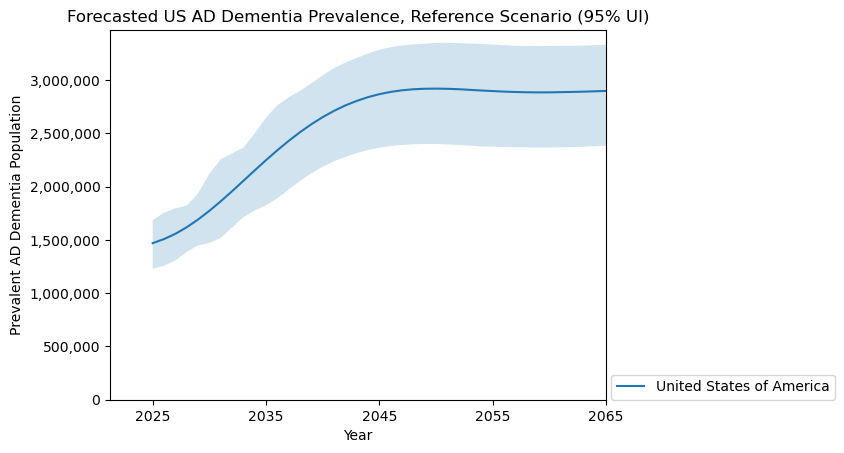

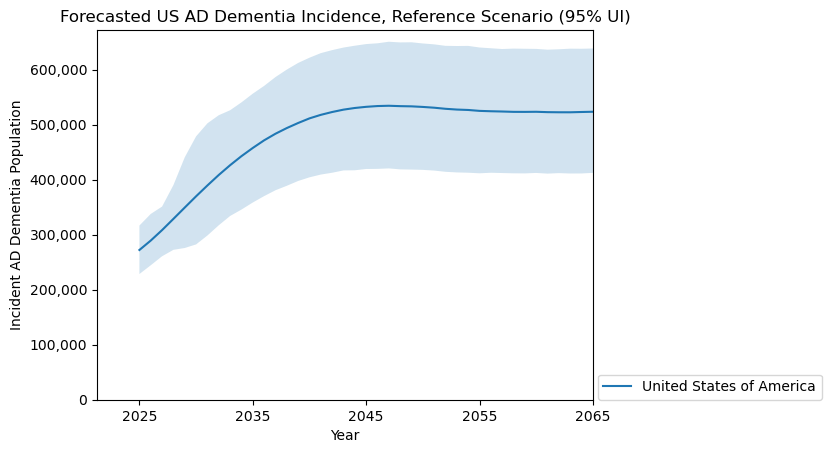

<Figure size 640x480 with 0 Axes>

In [8]:
make_forecast_plot(
    filter_results(
        res,
        ["Year"],
        location=["United States of America"],
        stage=["AD Dementia"],
        measure=["Prevalence"],
    ),
    "Forecasted US AD Dementia Prevalence, Reference Scenario (95% UI)",
    "Prevalent AD Dementia Population",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year"],
        location=["United States of America"],
        stage=["AD Dementia"],
        measure=["Incidence"],
    ),
    "Forecasted US AD Dementia Incidence, Reference Scenario (95% UI)",
    "Incident AD Dementia Population",
)

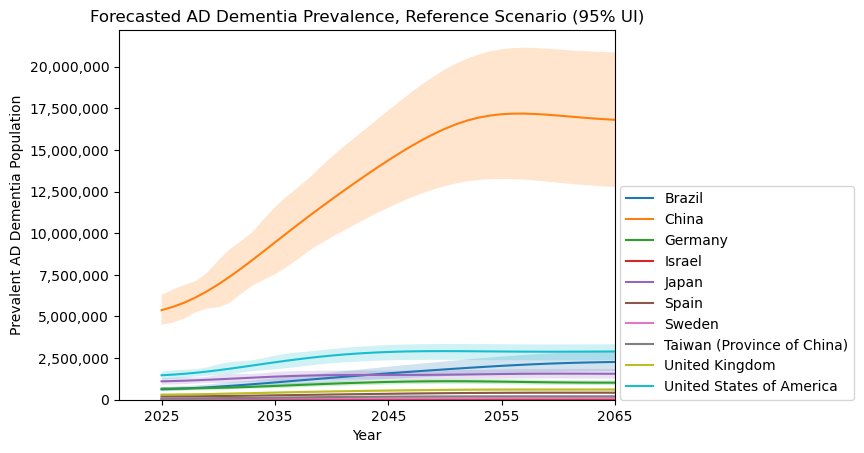

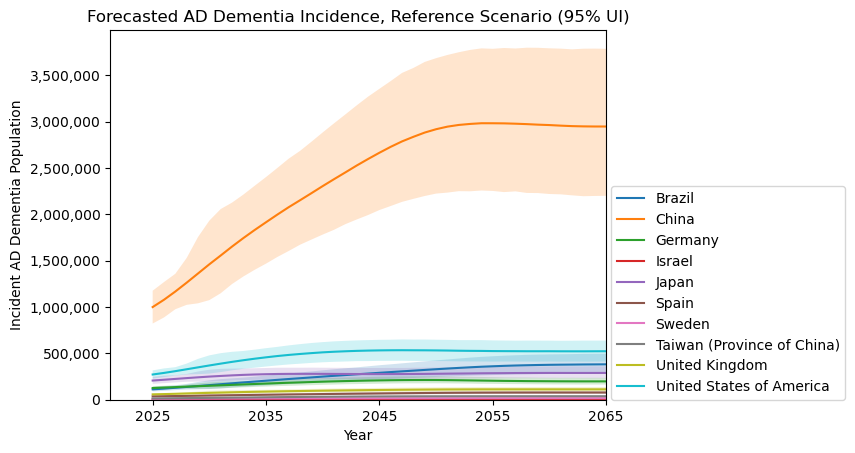

<Figure size 640x480 with 0 Axes>

In [9]:
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Location"],
        stage=["AD Dementia"],
        measure=["Prevalence"],
    ),
    "Forecasted AD Dementia Prevalence, Reference Scenario (95% UI)",
    "Prevalent AD Dementia Population",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Location"],
        stage=["AD Dementia"],
        measure=["Incidence"],
    ),
    "Forecasted AD Dementia Incidence, Reference Scenario (95% UI)",
    "Incident AD Dementia Population",
)

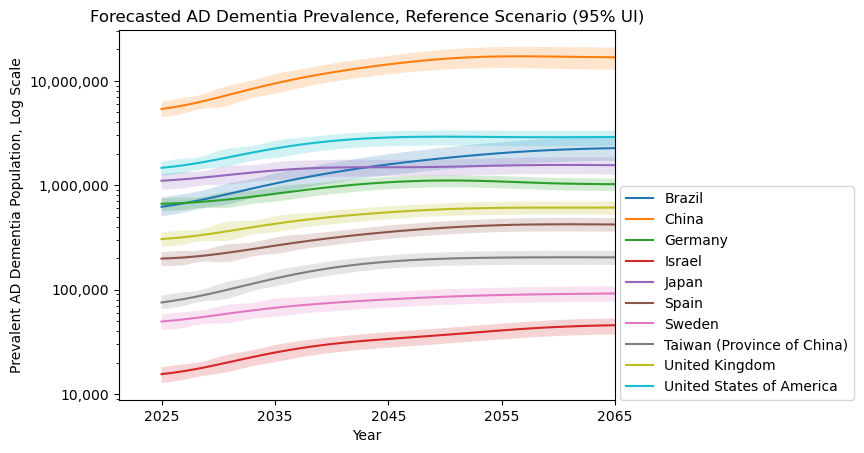

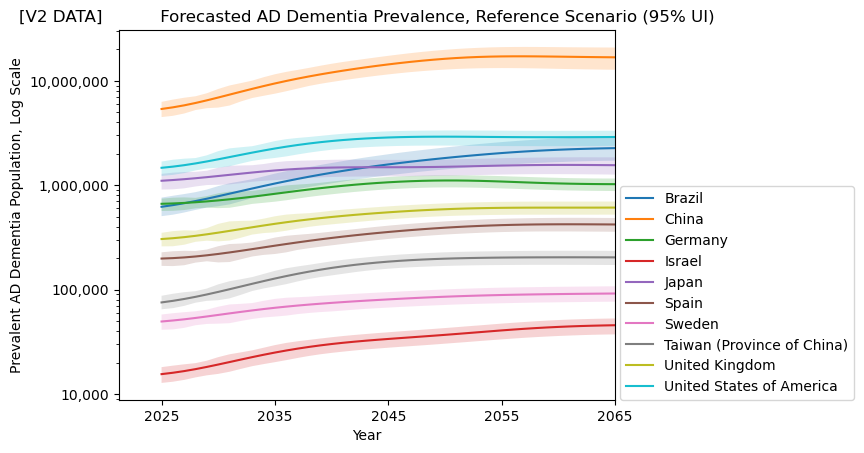

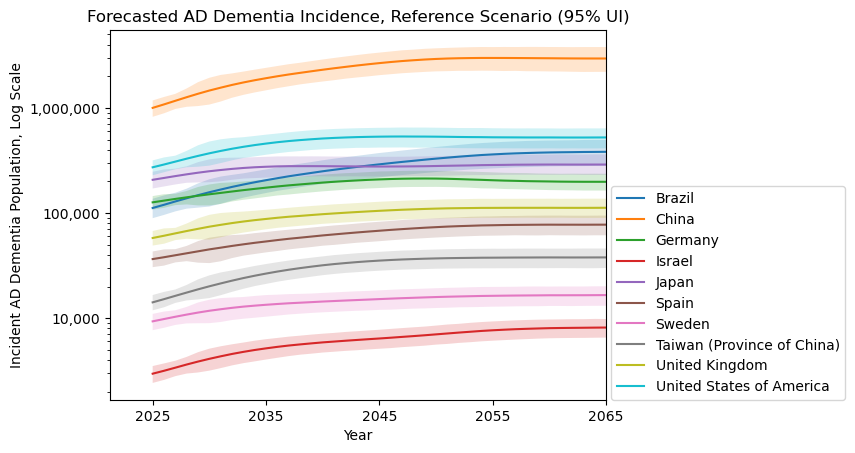

<Figure size 640x480 with 0 Axes>

In [10]:
df = filter_results(
    res,
    ["Year", "Location"],
    stage=["AD Dementia"],
    measure=["Prevalence"],
)
make_forecast_plot(
    df,
    "Forecasted AD Dementia Prevalence, Reference Scenario (95% UI)",
    "Prevalent AD Dementia Population, Log Scale",
    scale="log",
)
df_v2 = filter_results(
    v2_res,
    ["Year", "Location"],
    stage=["AD Dementia"],
    measure=["Prevalence"],
)
make_forecast_plot(
    df_v2,
    "[V2 DATA]           Forecasted AD Dementia Prevalence, Reference Scenario (95% UI)",
    "Prevalent AD Dementia Population, Log Scale",
    scale="log",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Location"],
        stage=["AD Dementia"],
        measure=["Incidence"],
    ),
    "Forecasted AD Dementia Incidence, Reference Scenario (95% UI)",
    "Incident AD Dementia Population, Log Scale",
    scale="log",
)

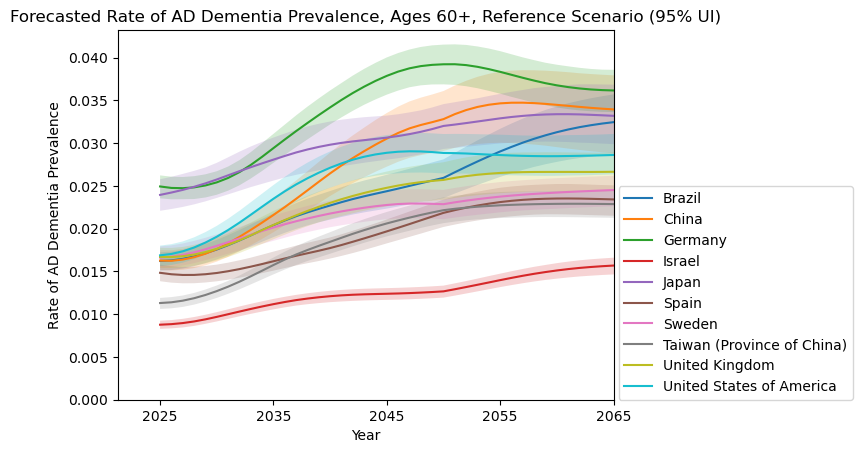

<Figure size 640x480 with 0 Axes>

In [11]:
df = filter_results(
    res,
    ["Year", "Location"],
    age=["60_plus"],
    sex=["Both"],
    stage=["AD Dementia"],
    measure=["Prevalence"],
    metric=["Rate"],
)
make_forecast_plot(
    df,
    "Forecasted Rate of AD Dementia Prevalence, Ages 60+, Reference Scenario (95% UI)",
    "Rate of AD Dementia Prevalence",
)

In [12]:
# make_forecast_plot(
#    filter_results(
#        res,
#        ["Year", "Location"],
#        stage=["AD Dementia"],
#        measure=["Prevalence"],
#        metric=["Rate"],
#    ),
#    "Forecasted AD Dementia Prevalence, Reference Scenario (95% UI)",
#    "Rate of AD Dementia Prevalence",
# )
# make_forecast_plot(
#     filter_results(
#         res,
#         ["Year", "Location"],
#         stage=["AD Dementia"],
#         measure=["Incidence"],
#         metric=["Rate"],
#     ),
#     "Forecasted AD Dementia Incidence, Reference Scenario (95% UI)",
#     "Rate of AD Dementia Incidence",
# )

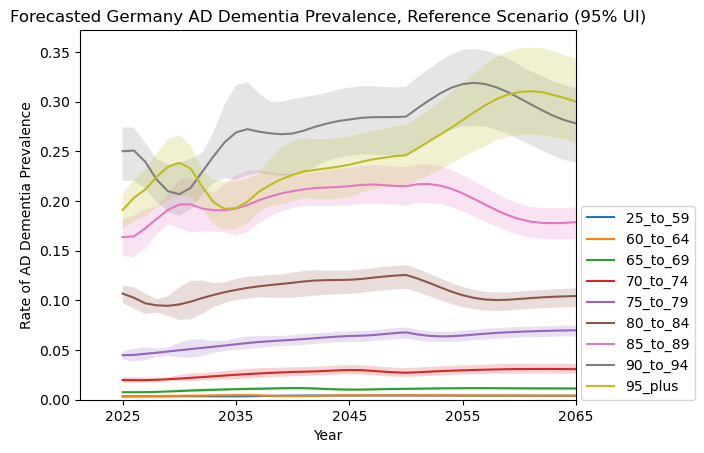

<Figure size 640x480 with 0 Axes>

In [13]:
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Age"],
        location=["Germany"],
        stage=["AD Dementia"],
        measure=["Prevalence"],
        metric=["Rate"],
    ),
    "Forecasted Germany AD Dementia Prevalence, Reference Scenario (95% UI)",
    "Rate of AD Dementia Prevalence",
    "Age",
)

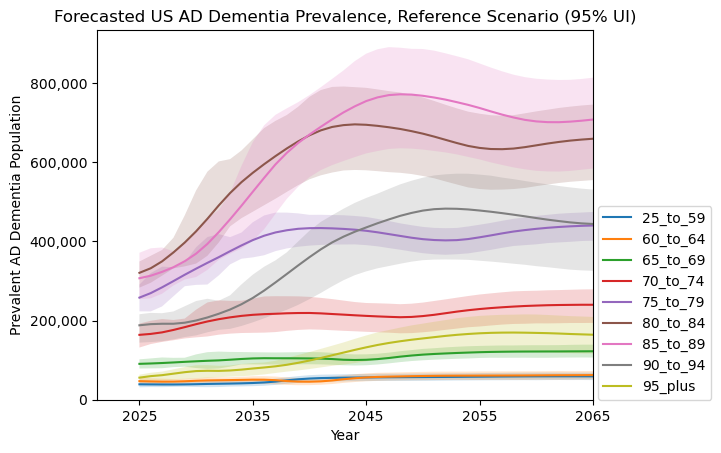

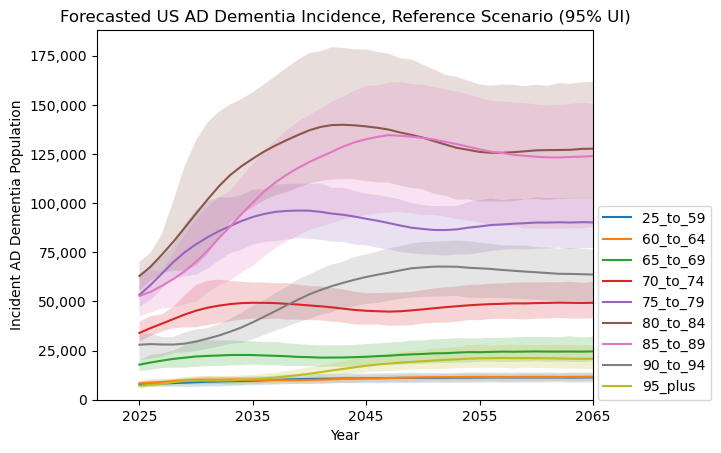

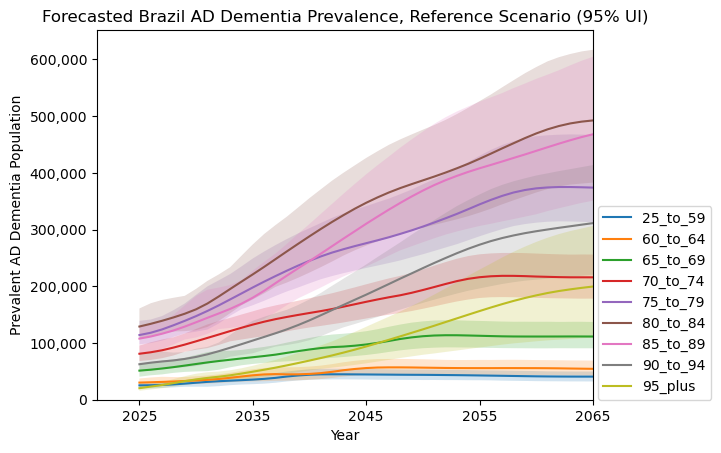

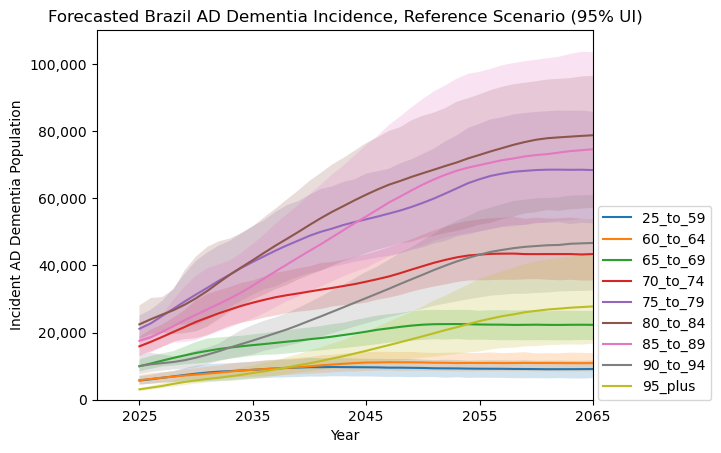

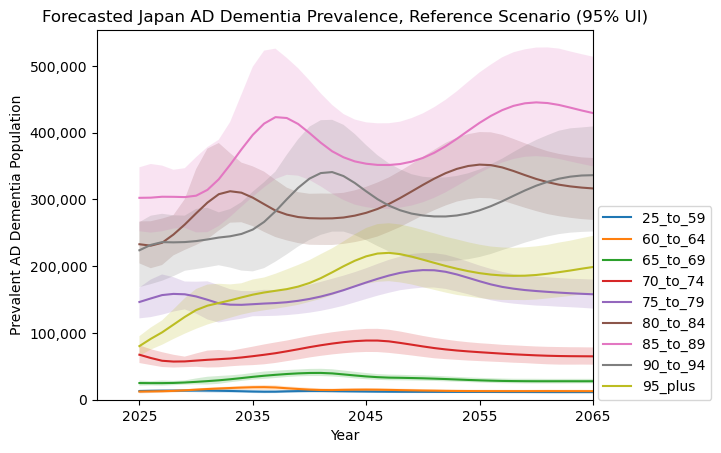

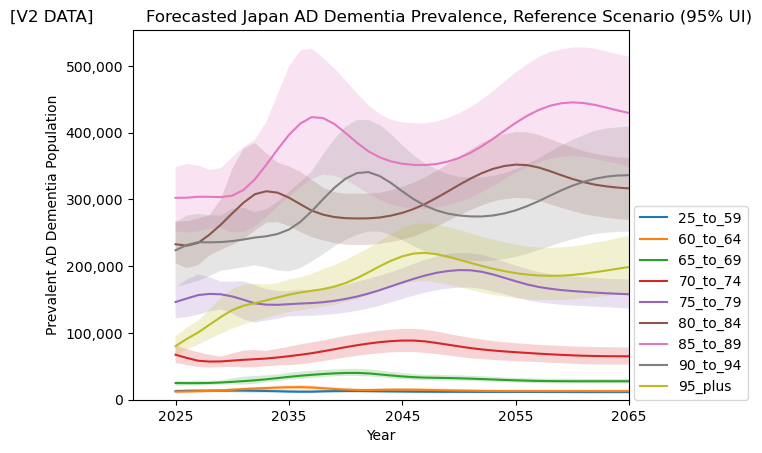

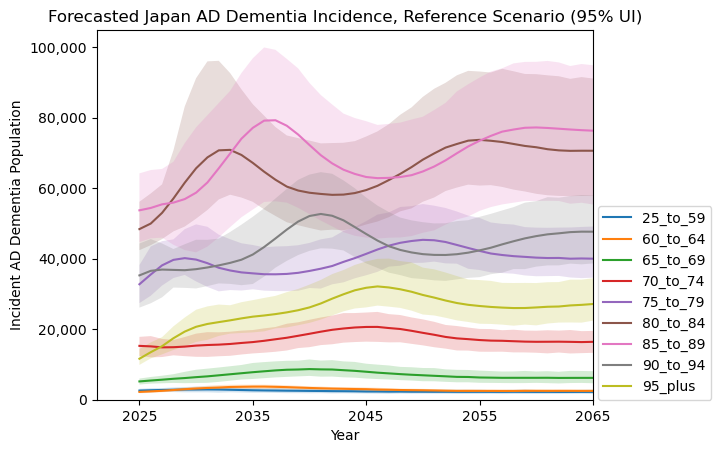

<Figure size 640x480 with 0 Axes>

In [14]:
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Age"],
        location=["United States of America"],
        stage=["AD Dementia"],
        measure=["Prevalence"],
    ),
    "Forecasted US AD Dementia Prevalence, Reference Scenario (95% UI)",
    "Prevalent AD Dementia Population",
    strat_col="Age",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Age"],
        location=["United States of America"],
        stage=["AD Dementia"],
        measure=["Incidence"],
    ),
    "Forecasted US AD Dementia Incidence, Reference Scenario (95% UI)",
    "Incident AD Dementia Population",
    strat_col="Age",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Age"],
        location=["Brazil"],
        stage=["AD Dementia"],
        measure=["Prevalence"],
    ),
    "Forecasted Brazil AD Dementia Prevalence, Reference Scenario (95% UI)",
    "Prevalent AD Dementia Population",
    strat_col="Age",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Age"],
        location=["Brazil"],
        stage=["AD Dementia"],
        measure=["Incidence"],
    ),
    "Forecasted Brazil AD Dementia Incidence, Reference Scenario (95% UI)",
    "Incident AD Dementia Population",
    strat_col="Age",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Age"],
        location=["Japan"],
        stage=["AD Dementia"],
        measure=["Prevalence"],
    ),
    "Forecasted Japan AD Dementia Prevalence, Reference Scenario (95% UI)",
    "Prevalent AD Dementia Population",
    strat_col="Age",
)
make_forecast_plot(
    filter_results(
        v2_res,
        ["Year", "Age"],
        location=["Japan"],
        stage=["AD Dementia"],
        measure=["Prevalence"],
    ),
    "[V2 DATA]          Forecasted Japan AD Dementia Prevalence, Reference Scenario (95% UI)",
    "Prevalent AD Dementia Population",
    strat_col="Age",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Age"],
        location=["Japan"],
        stage=["AD Dementia"],
        measure=["Incidence"],
    ),
    "Forecasted Japan AD Dementia Incidence, Reference Scenario (95% UI)",
    "Incident AD Dementia Population",
    strat_col="Age",
)

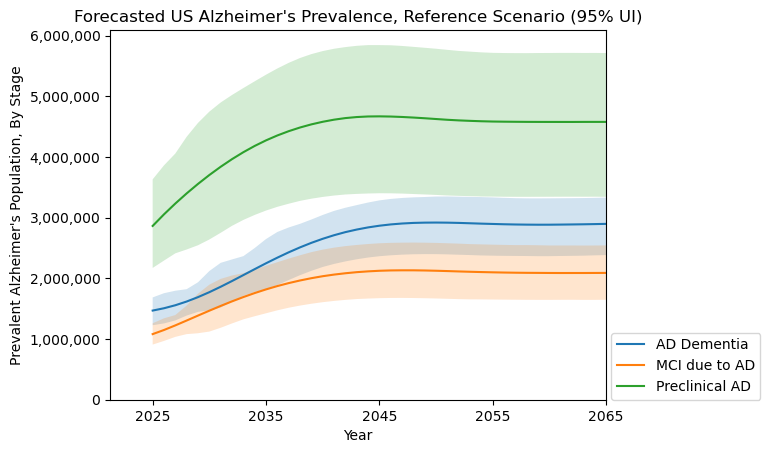

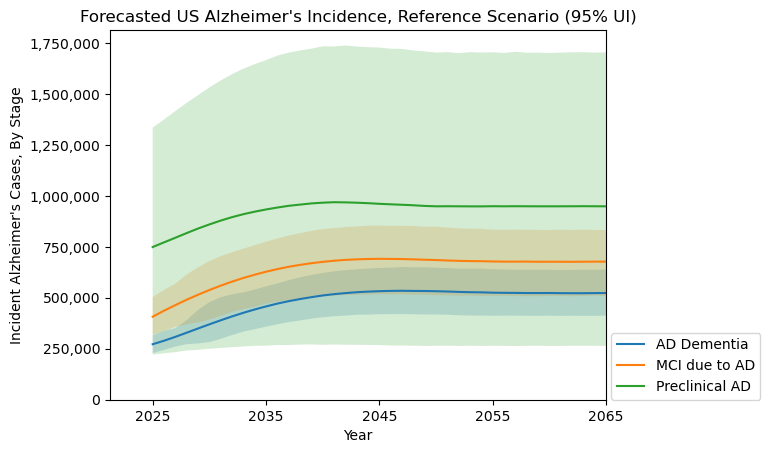

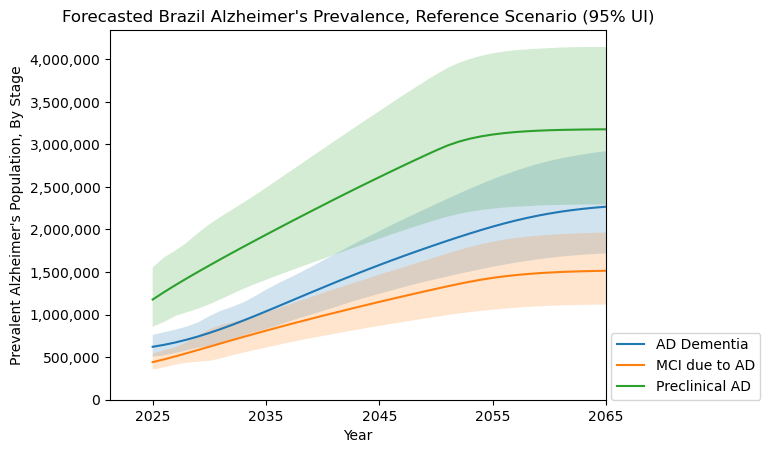

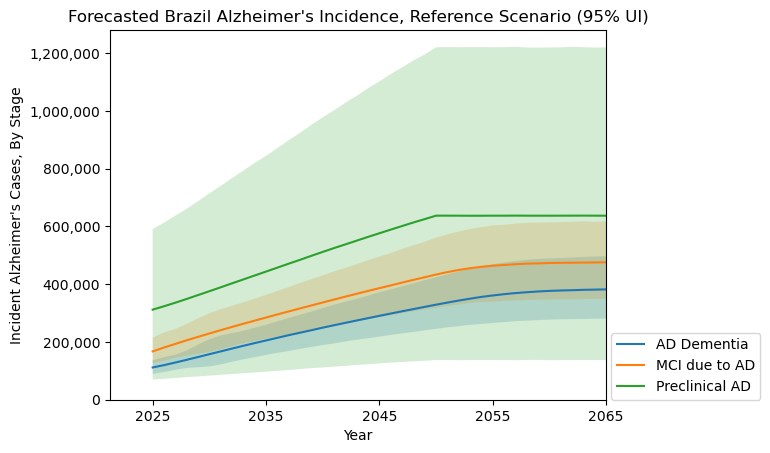

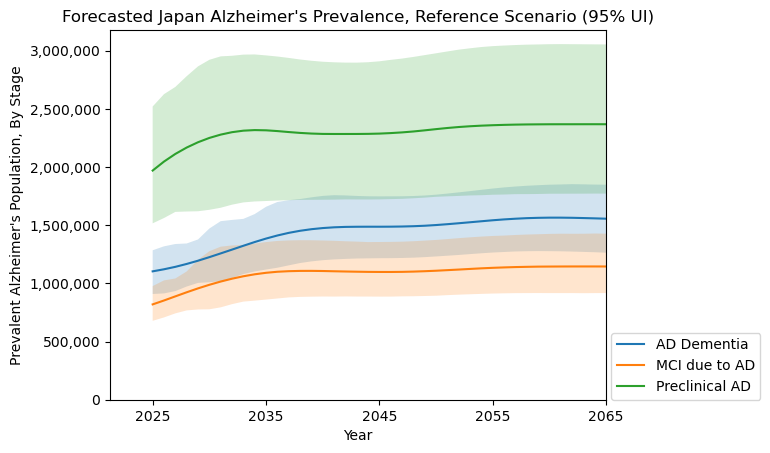

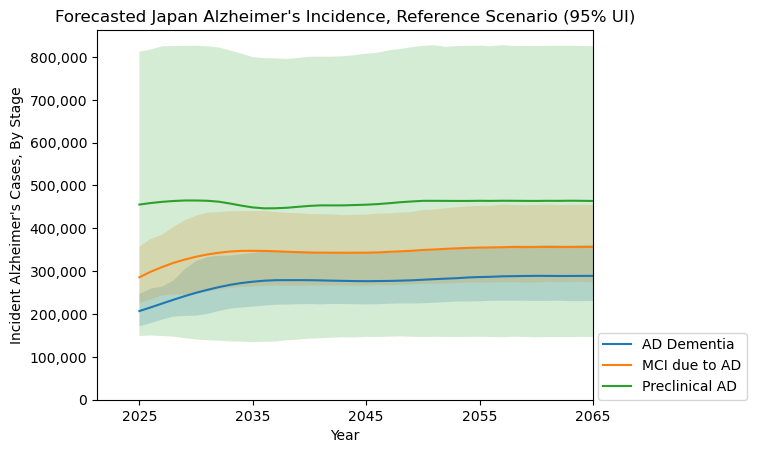

<Figure size 640x480 with 0 Axes>

In [15]:
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Disease Stage"],
        location=["United States of America"],
        measure=["Prevalence"],
    ),
    "Forecasted US Alzheimer's Prevalence, Reference Scenario (95% UI)",
    "Prevalent Alzheimer's Population, By Stage",
    strat_col="Disease Stage",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Disease Stage"],
        location=["United States of America"],
        measure=["Incidence"],
    ),
    "Forecasted US Alzheimer's Incidence, Reference Scenario (95% UI)",
    "Incident Alzheimer's Cases, By Stage",
    strat_col="Disease Stage",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Disease Stage"],
        location=["Brazil"],
        measure=["Prevalence"],
    ),
    "Forecasted Brazil Alzheimer's Prevalence, Reference Scenario (95% UI)",
    "Prevalent Alzheimer's Population, By Stage",
    strat_col="Disease Stage",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Disease Stage"],
        location=["Brazil"],
        measure=["Incidence"],
    ),
    "Forecasted Brazil Alzheimer's Incidence, Reference Scenario (95% UI)",
    "Incident Alzheimer's Cases, By Stage",
    strat_col="Disease Stage",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Disease Stage"],
        location=["Japan"],
        measure=["Prevalence"],
    ),
    "Forecasted Japan Alzheimer's Prevalence, Reference Scenario (95% UI)",
    "Prevalent Alzheimer's Population, By Stage",
    strat_col="Disease Stage",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Disease Stage"],
        location=["Japan"],
        measure=["Incidence"],
    ),
    "Forecasted Japan Alzheimer's Incidence, Reference Scenario (95% UI)",
    "Incident Alzheimer's Cases, By Stage",
    strat_col="Disease Stage",
)

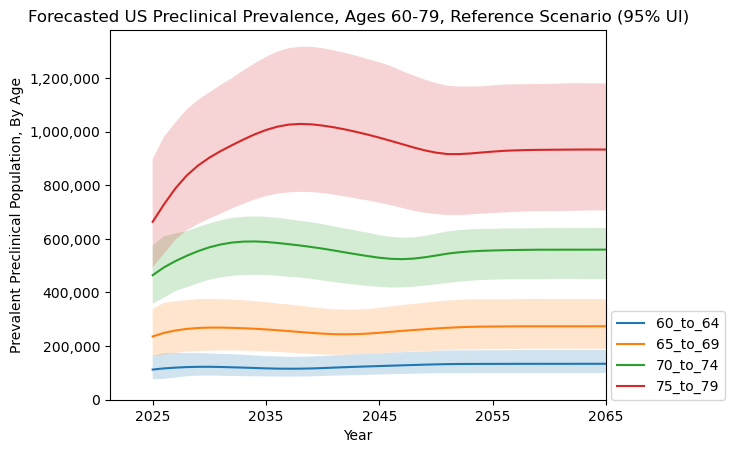

<Figure size 640x480 with 0 Axes>

In [ ]:
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Age"],
        location=["United States of America"],
        measure=["Prevalence"],
        stage=["Preclinical AD"],
        age=["60_to_64", "65_to_69", "70_to_74", "75_to_79"],
    ),
    "Forecasted US Preclinical Prevalence, Ages 60-79, Reference Scenario (95% UI)",
    "Prevalent Preclinical Population, By Age",
    strat_col="Age",
)

519142.9733771229

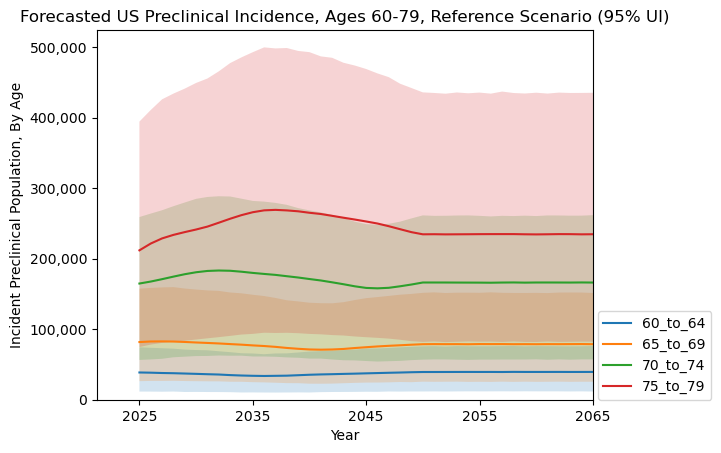

<Figure size 640x480 with 0 Axes>

In [88]:
df = filter_results(
    res,
    ["Year"],
    location=["United States of America"],
    measure=["Incidence"],
    stage=["Preclinical AD"],
    age=["60_to_64", "65_to_69", "70_to_74", "75_to_79"],
)

make_forecast_plot(
    df,
    "Forecasted US Preclinical Incidence, Ages 60-79, Reference Scenario (95% UI)",
    "Incident Preclinical Population, By Age",
    strat_col="Age",
)

df[df["Year"] == 2100]["Mean"].sum()

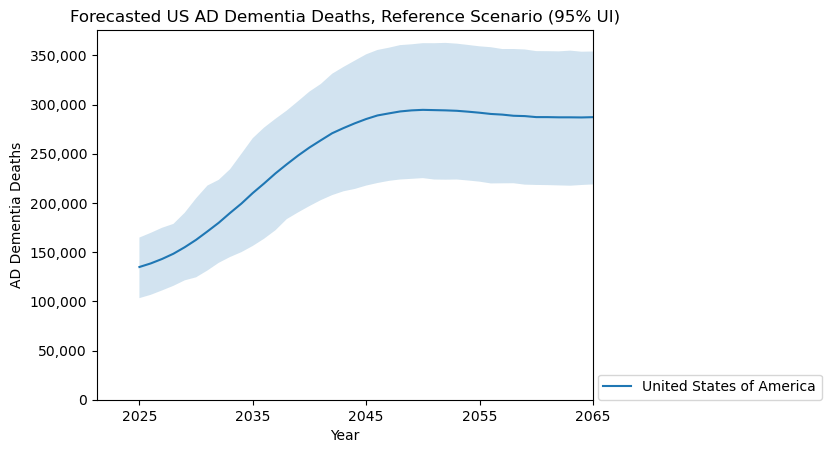

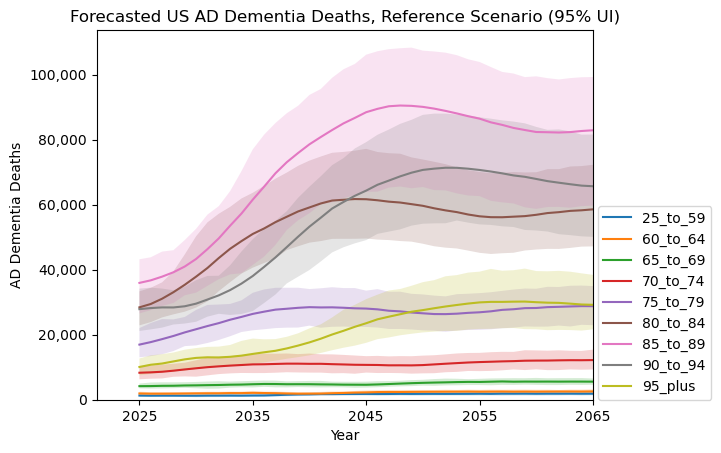

<Figure size 640x480 with 0 Axes>

In [16]:
make_forecast_plot(
    filter_results(
        res,
        ["Year"],
        location=["United States of America"],
        measure=["Deaths Associated with AD"],
    ),
    "Forecasted US AD Dementia Deaths, Reference Scenario (95% UI)",
    "AD Dementia Deaths",
)
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Age"],
        location=["United States of America"],
        measure=["Deaths Associated with AD"],
    ),
    "Forecasted US AD Dementia Deaths, Reference Scenario (95% UI)",
    "AD Dementia Deaths",
    "Age",
)

# Testing

In [17]:
csf_pet = pd.read_csv(Path(results_dir_old) / "csf_pet_tests.csv")
bbbm = pd.read_csv(Path(results_dir_old) / "bbbm_tests.csv")
_res2_OLD = pd.concat([csf_pet, bbbm])
_res2_OLD

Year                  Location       Age     Sex  Disease Stage  \
0      2025                    Brazil  25_to_29  Female  MCI due to AD   
1      2025                    Brazil  25_to_29  Female  MCI due to AD   
2      2025                    Brazil  25_to_29  Female  MCI due to AD   
3      2025                    Brazil  25_to_29  Female  MCI due to AD   
4      2025                    Brazil  25_to_29  Female  MCI due to AD   
...     ...                       ...       ...     ...            ...   
79655  2100  United States of America  75_to_80  Female    Susceptible   
79656  2100  United States of America  60_to_65    Male    Susceptible   
79657  2100  United States of America  65_to_70    Male    Susceptible   
79658  2100  United States of America  70_to_75    Male    Susceptible   
79659  2100  United States of America  75_to_80    Male    Susceptible   

                         Scenario                    Measure  Metric  \
0                       Reference          Averted CSF Tests  Number   
1                       Reference          Averted PET Tests  Number   
2                       Reference                  CSF Tests  Number   
3                       Reference                  PET Tests  Number   
4               BBBM Testing Only          Averted CSF Tests  Number   
...                           ...                        ...     ...   
79655  BBBM Testing and Treatment  BBBM False Positive Tests  Number   
79656  BBBM Testing and Treatment  BBBM False Positive Tests  Number   
79657  BBBM Testing and Treatment  BBBM False Positive Tests  Number   
79658  BBBM Testing and Treatment  BBBM False Positive Tests  Number   
79659  BBBM Testing and Treatment  BBBM False Positive Tests  Number   

                Mean   95% UI Lower   95% UI Upper  
0           0.000000       0.000000       0.000000  
1           0.000000       0.000000       0.000000  
2           0.000000       0.000000       0.000000  
3           0.000000       0.000000       0.000000  
4           0.000000       0.000000       0.000000  
...              ...            ...            ...  
79655  146774.863478  136236.289374  154975.735010  
79656  231725.331175  215371.159718  244914.562719  
79657  187697.518252  174450.639371  198380.795803  
79658   80018.415676   74371.062048   84572.865579  
79659  136831.490805  127174.516102  144619.600140  

[349660 rows x 11 columns]

In [18]:
draw_level_results = pd.read_csv(
    "/snfs1/Project/simulation_science/alzheimers/results_11_14_2025_mslt/2025_11_14__14_11_42_outside_sim_results_draw_level.csv"
)
df = draw_level_results.query(
    "Year == 2100 & Location == 'United States of America' & Age == '75_to_79' & Sex == 'Male' & `Disease Stage` == 'Susceptible' & Scenario == 'BBBM Testing Only' & Measure == 'BBBM False Positive Tests'"
).drop(["Unnamed: 0", "Draw"], axis=1)
display(df.columns)
df.groupby(df.columns.drop("Value").tolist()).mean()

Index(['Year', 'Location', 'Age', 'Sex', 'Disease Stage', 'Scenario',
       'Measure', 'Metric', 'Value'],
      dtype='object')

Value
Year Location                 Age      Sex  Disease Stage Scenario          Measure                   Metric               
2100 United States of America 75_to_79 Male Susceptible   BBBM Testing Only BBBM False Positive Tests Number  136831.490805

In [19]:
csf_pet = pd.read_csv(Path(results_dir_new) / "csf_pet_tests.csv")
bbbm = pd.read_csv(Path(results_dir_new) / "bbbm_tests.csv")
res2 = pd.concat([csf_pet, bbbm])
display(res2["Measure"].unique())
# display(res2[res2["Measure"] == "Positive BBBM Tests"])
# display(res2[res2["Measure"] == "BBBM Positive Tests"])
v2_res2 = pd.concat(
    [
        pd.read_csv(Path(results_dir_v2) / "csf_pet_tests.csv"),
        pd.read_csv(Path(results_dir_v2) / "bbbm_tests.csv"),
    ]
)
v1_res2 = pd.concat(
    [
        pd.read_csv(Path(results_dir_v1) / "csf_pet_tests.csv"),
        pd.read_csv(Path(results_dir_v1) / "bbbm_tests.csv"),
    ]
)
old_res2 = pd.concat(
    [
        pd.read_csv(Path(results_dir_old) / "csf_pet_tests.csv"),
        pd.read_csv(Path(results_dir_old) / "bbbm_tests.csv"),
    ]
)
res2[res2["Metric"] == "Number"]

array(['CSF Tests', 'PET Tests', 'Averted CSF Tests', 'Averted PET Tests',
       'BBBM Tests', 'Positive BBBM Tests'], dtype=object)

Year                  Location       Age     Sex  Disease Stage  \
0       2025                    Brazil  60_to_64  Female  MCI due to AD   
1       2025                    Brazil  60_to_64    Male  MCI due to AD   
2       2025                    Brazil  60_to_64    Both  MCI due to AD   
3       2025                    Brazil  60_to_64  Female  MCI due to AD   
4       2025                    Brazil  60_to_64    Male  MCI due to AD   
...      ...                       ...       ...     ...            ...   
227989  2100  United States of America   60_plus    Male    Susceptible   
227990  2100  United States of America   60_plus    Both    Susceptible   
227991  2100  United States of America   60_plus  Female    Susceptible   
227992  2100  United States of America   60_plus    Male    Susceptible   
227993  2100  United States of America   60_plus    Both    Susceptible   

                          Scenario              Measure  Metric          Mean  \
0                        Reference            CSF Tests  Number  9.182352e+02   
1                        Reference            CSF Tests  Number  4.209289e+02   
2                        Reference            CSF Tests  Number  1.339164e+03   
3                BBBM Testing Only            CSF Tests  Number  9.182352e+02   
4                BBBM Testing Only            CSF Tests  Number  4.209289e+02   
...                            ...                  ...     ...           ...   
227989           BBBM Testing Only  Positive BBBM Tests  Number  6.362728e+05   
227990           BBBM Testing Only  Positive BBBM Tests  Number  1.318783e+06   
227991  BBBM Testing and Treatment  Positive BBBM Tests  Number  6.825099e+05   
227992  BBBM Testing and Treatment  Positive BBBM Tests  Number  6.362728e+05   
227993  BBBM Testing and Treatment  Positive BBBM Tests  Number  1.318783e+06   

        95% UI Lower  95% UI Upper  
0       3.608762e+02  1.340475e+03  
1       1.501496e+02  6.799540e+02  
2       5.110258e+02  2.014499e+03  
3       3.608762e+02  1.340475e+03  
4       1.501496e+02  6.799540e+02  
...              ...           ...  
227989  5.913674e+05  6.724878e+05  
227990  1.224872e+06  1.392625e+06  
227991  6.335050e+05  7.206443e+05  
227992  5.913674e+05  6.724878e+05  
227993  1.224872e+06  1.392625e+06  

[478800 rows x 11 columns]

Empty DataFrame
Columns: [Year, Location, Age, Sex, Disease Stage, Scenario, Measure, Metric, Mean, 95% UI Lower, 95% UI Upper]
Index: []

In [20]:
# Check 2099 vs 2100 data
display(
    res2[
        (res2["Year"] == 2099)
        & (
            (res2["Age"] == "70_to_74") | (res2["Age"] == "70_to_75")
        )  # note my MSLT age group labels are off - I've fixed this for the plots in this nb and will fix it in the results as well when I rerun for pop
        & (res2["Location"] == "United States of America")
        & (res2["Sex"] == "Female")
    ]
)
display(
    res2[
        (res2["Year"] == 2100)
        & ((res2["Age"] == "70_to_74") | (res2["Age"] == "70_to_75"))
        & (res2["Location"] == "United States of America")
        & (res2["Sex"] == "Female")
    ]
)

Year                  Location       Age     Sex   Disease Stage  \
136680  2099  United States of America  70_to_74  Female   MCI due to AD   
136683  2099  United States of America  70_to_74  Female   MCI due to AD   
136686  2099  United States of America  70_to_74  Female   MCI due to AD   
136689  2099  United States of America  70_to_74  Female   MCI due to AD   
136692  2099  United States of America  70_to_74  Female   MCI due to AD   
136695  2099  United States of America  70_to_74  Female   MCI due to AD   
136698  2099  United States of America  70_to_74  Female   MCI due to AD   
136701  2099  United States of America  70_to_74  Female   MCI due to AD   
136704  2099  United States of America  70_to_74  Female   MCI due to AD   
136707  2099  United States of America  70_to_74  Female   MCI due to AD   
136710  2099  United States of America  70_to_74  Female   MCI due to AD   
136713  2099  United States of America  70_to_74  Female   MCI due to AD   
136716  2099  United States of America  70_to_74  Female   MCI due to AD   
136719  2099  United States of America  70_to_74  Female   MCI due to AD   
136722  2099  United States of America  70_to_74  Female   MCI due to AD   
136725  2099  United States of America  70_to_74  Female   MCI due to AD   
136728  2099  United States of America  70_to_74  Female   MCI due to AD   
136731  2099  United States of America  70_to_74  Female   MCI due to AD   
136734  2099  United States of America  70_to_74  Female   MCI due to AD   
136737  2099  United States of America  70_to_74  Female   MCI due to AD   
118164  2099  United States of America  70_to_74  Female  Preclinical AD   
118167  2099  United States of America  70_to_74  Female  Preclinical AD   
118170  2099  United States of America  70_to_74  Female  Preclinical AD   
118173  2099  United States of America  70_to_74  Female  Preclinical AD   
118176  2099  United States of America  70_to_74  Female  Preclinical AD   
118179  2099  United States of America  70_to_74  Female  Preclinical AD   
118182  2099  United States of America  70_to_74  Female  Preclinical AD   
118185  2099  United States of America  70_to_74  Female  Preclinical AD   
118188  2099  United States of America  70_to_74  Female  Preclinical AD   
118191  2099  United States of America  70_to_74  Female  Preclinical AD   
118194  2099  United States of America  70_to_74  Female  Preclinical AD   
118197  2099  United States of America  70_to_74  Female  Preclinical AD   
136536  2099  United States of America  70_to_74  Female     Susceptible   
136539  2099  United States of America  70_to_74  Female     Susceptible   
136542  2099  United States of America  70_to_74  Female     Susceptible   
136545  2099  United States of America  70_to_74  Female     Susceptible   
136548  2099  United States of America  70_to_74  Female     Susceptible   
136551  2099  United States of America  70_to_74  Female     Susceptible   
136554  2099  United States of America  70_to_74  Female     Susceptible   
136557  2099  United States of America  70_to_74  Female     Susceptible   

                          Scenario              Measure  Metric  \
136680                   Reference            CSF Tests  Number   
136683           BBBM Testing Only            CSF Tests  Number   
136686  BBBM Testing and Treatment            CSF Tests  Number   
136689                   Reference            CSF Tests    Rate   
136692           BBBM Testing Only            CSF Tests    Rate   
136695  BBBM Testing and Treatment            CSF Tests    Rate   
136698                   Reference            PET Tests  Number   
136701           BBBM Testing Only            PET Tests  Number   
136704  BBBM Testing and Treatment            PET Tests  Number   
136707                   Reference            PET Tests    Rate   
136710           BBBM Testing Only            PET Tests    Rate   
136713  BBBM Testing and Treatment            PET Tests    Rate   
136716           BBB

Year                  Location       Age     Sex   Disease Stage  \
136740  2100  United States of America  70_to_74  Female   MCI due to AD   
136743  2100  United States of America  70_to_74  Female   MCI due to AD   
136746  2100  United States of America  70_to_74  Female   MCI due to AD   
136749  2100  United States of America  70_to_74  Female   MCI due to AD   
136752  2100  United States of America  70_to_74  Female   MCI due to AD   
136755  2100  United States of America  70_to_74  Female   MCI due to AD   
136758  2100  United States of America  70_to_74  Female   MCI due to AD   
136761  2100  United States of America  70_to_74  Female   MCI due to AD   
136764  2100  United States of America  70_to_74  Female   MCI due to AD   
136767  2100  United States of America  70_to_74  Female   MCI due to AD   
136770  2100  United States of America  70_to_74  Female   MCI due to AD   
136773  2100  United States of America  70_to_74  Female   MCI due to AD   
136776  2100  United States of America  70_to_74  Female   MCI due to AD   
136779  2100  United States of America  70_to_74  Female   MCI due to AD   
136782  2100  United States of America  70_to_74  Female   MCI due to AD   
136785  2100  United States of America  70_to_74  Female   MCI due to AD   
136788  2100  United States of America  70_to_74  Female   MCI due to AD   
136791  2100  United States of America  70_to_74  Female   MCI due to AD   
136794  2100  United States of America  70_to_74  Female   MCI due to AD   
136797  2100  United States of America  70_to_74  Female   MCI due to AD   
118524  2100  United States of America  70_to_74  Female  Preclinical AD   
118527  2100  United States of America  70_to_74  Female  Preclinical AD   
118530  2100  United States of America  70_to_74  Female  Preclinical AD   
118533  2100  United States of America  70_to_74  Female  Preclinical AD   
118536  2100  United States of America  70_to_74  Female  Preclinical AD   
118539  2100  United States of America  70_to_74  Female  Preclinical AD   
118542  2100  United States of America  70_to_74  Female  Preclinical AD   
118545  2100  United States of America  70_to_74  Female  Preclinical AD   
118548  2100  United States of America  70_to_74  Female  Preclinical AD   
118551  2100  United States of America  70_to_74  Female  Preclinical AD   
118554  2100  United States of America  70_to_74  Female  Preclinical AD   
118557  2100  United States of America  70_to_74  Female  Preclinical AD   
136776  2100  United States of America  70_to_74  Female     Susceptible   
136779  2100  United States of America  70_to_74  Female     Susceptible   
136782  2100  United States of America  70_to_74  Female     Susceptible   
136785  2100  United States of America  70_to_74  Female     Susceptible   
136788  2100  United States of America  70_to_74  Female     Susceptible   
136791  2100  United States of America  70_to_74  Female     Susceptible   
136794  2100  United States of America  70_to_74  Female     Susceptible   
136797  2100  United States of America  70_to_74  Female     Susceptible   

                          Scenario              Measure  Metric  \
136740                   Reference            CSF Tests  Number   
136743           BBBM Testing Only            CSF Tests  Number   
136746  BBBM Testing and Treatment            CSF Tests  Number   
136749                   Reference            CSF Tests    Rate   
136752           BBBM Testing Only            CSF Tests    Rate   
136755  BBBM Testing and Treatment            CSF Tests    Rate   
136758                   Reference            PET Tests  Number   
136761           BBBM Testing Only            PET Tests  Number   
136764  BBBM Testing and Treatment            PET Tests  Number   
136767                   Reference            PET Tests    Rate   
136770           BBBM Testing Only            PET Tests    Rate   
136773  BBBM Testing and Treatment            PET Tests    Rate   
136776           BBB

In [21]:
display(
    res2[
        (res2["Year"] == 2100)
        & (res2["Age"] == "60_to_65")
        & (res2["Location"] == "United States of America")
    ]
)

Empty DataFrame
Columns: [Year, Location, Age, Sex, Disease Stage, Scenario, Measure, Metric, Mean, 95% UI Lower, 95% UI Upper]
Index: []

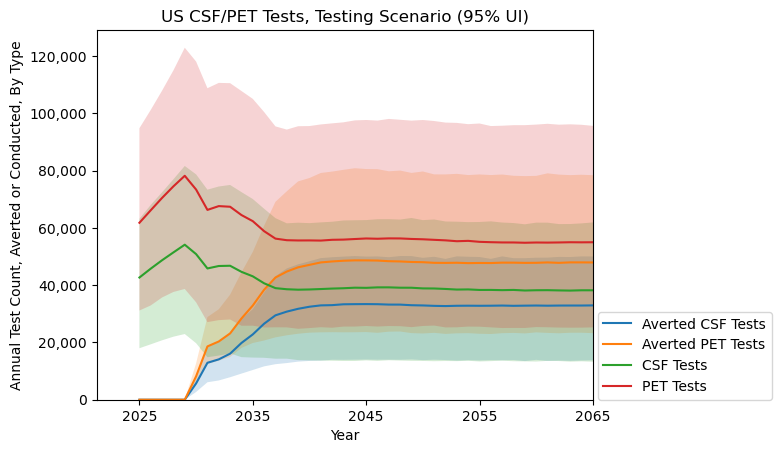

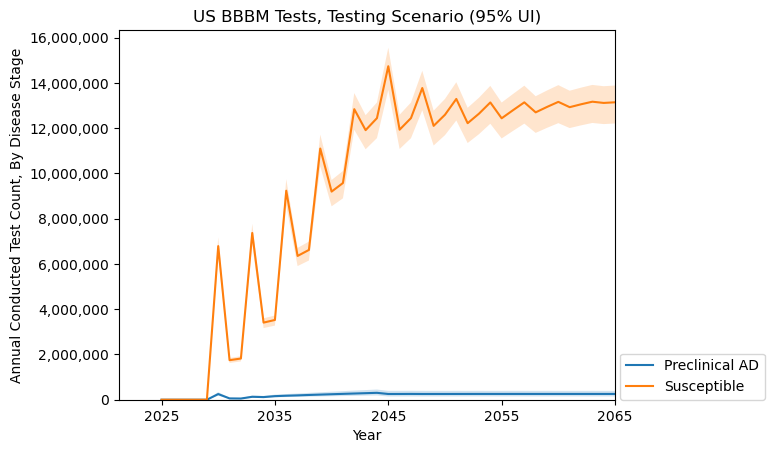

<Figure size 640x480 with 0 Axes>

In [22]:
make_forecast_plot(
    filter_results(
        res2,
        ["Year"],
        location=["United States of America"],
        measure=[
            "Averted CSF Tests",
            "Averted PET Tests",
            "CSF Tests",
            "PET Tests",
        ],  # BBBM Tests results in this scenario dont yet include MSLT
        scenario=["BBBM Testing Only"],
    ),
    "US CSF/PET Tests, Testing Scenario (95% UI)",
    "Annual Test Count, Averted or Conducted, By Type",
    "Measure",
)

make_forecast_plot(
    filter_results(
        res2,
        ["Year", "Disease Stage"],
        location=["United States of America"],
        measure=["BBBM Tests"],
        scenario=["BBBM Testing and Treatment"],
    ),
    "US BBBM Tests, Testing Scenario (95% UI)",
    "Annual Conducted Test Count, By Disease Stage",
    "Disease Stage",
)

<Figure size 640x480 with 0 Axes>

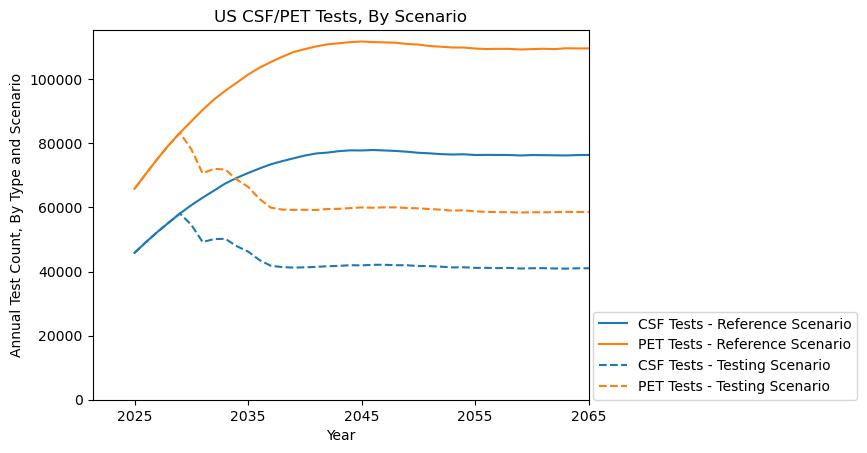

<Figure size 640x480 with 0 Axes>

In [23]:
base = filter_results(
    v1_res2,
    ["Year"],
    location=["United States of America"],
    measure=[
        "CSF Tests",
        "PET Tests",
    ],
    scenario=["Reference"],
)
# make_forecast_plot(
#    base,
#    "US CSF/PET Tests, Reference Scenario (95% UI)",
#    "Annual Test Count, By Type",
#    "Measure",
# )
test = filter_results(
    v1_res2,
    ["Year"],
    location=["United States of America"],
    measure=[
        "CSF Tests",
        "PET Tests",
    ],
    scenario=["BBBM Testing Only"],
)
# make_forecast_plot(
#    test,
#    "US CSF/PET Tests, Testing Scenario (95% UI)",
#    "Annual Test Count, By Type",
#    "Measure",
# )

base["Measure"] = base["Measure"].replace(
    {
        "CSF Tests": "CSF Tests - Reference Scenario",
        "PET Tests": "PET Tests - Reference Scenario",
    }
)
test["Measure"] = test["Measure"].replace(
    {
        "CSF Tests": "CSF Tests - Testing Scenario",
        "PET Tests": "PET Tests - Testing Scenario",
    }
)
mixed = pd.concat([base, test])
# TODO solid for reference, dotted for testing, same color
# thinner solid line in same color and style for uncertainty intervals, make main line thicker?
# try grid?
make_forecast_plot(
    # mixed,
    mixed.drop(["95% UI Lower", "95% UI Upper"], axis=1),
    "US CSF/PET Tests, By Scenario",
    "Annual Test Count, By Type and Scenario",
    "Measure",
    show=False,
)
ax = plt.gca()
colors = ["tab:blue", "tab:orange", "tab:blue", "tab:orange"]
styles = ["-", "-", "--", "--"]
measures = [
    "CSF Tests - Reference Scenario",
    "PET Tests - Reference Scenario",
    "CSF Tests - Testing Scenario",
    "PET Tests - Testing Scenario",
]
for idx, c in enumerate(colors):
    line = ax.lines[idx]
    line.set_color(c)
    line.set_linestyle(styles[idx])
    # line.set_linewidth(3)
    # df = mixed[mixed["Measure"] == measures[idx]]
    # ax.plot(df["Year"], df["95% UI Lower"], color=c, linestyle=styles[idx], linewidth=1)
    # ax.plot(df["Year"], df["95% UI Upper"], color=c, linestyle=styles[idx], linewidth=1)

plt.legend(loc=(1.01, 0))
# plt.ylim(top=650000)
plt.figure()

Year                  Location      Age   Sex           Scenario Metric  \
0    2025                     China  60_plus  Both          Reference   Rate   
1    2025                     Spain  60_plus  Both          Reference   Rate   
2    2025                    Sweden  60_plus  Both          Reference   Rate   
3    2025  United States of America  60_plus  Both          Reference   Rate   
4    2026                     China  60_plus  Both          Reference   Rate   
..    ...                       ...      ...   ...                ...    ...   
299  2099  United States of America  60_plus  Both  BBBM Testing Only   Rate   
300  2100                     China  60_plus  Both  BBBM Testing Only   Rate   
301  2100                     Spain  60_plus  Both  BBBM Testing Only   Rate   
302  2100                    Sweden  60_plus  Both  BBBM Testing Only   Rate   
303  2100  United States of America  60_plus  Both  BBBM Testing Only   Rate   

         Mean                                          Plot  
0    0.000198                             China - Reference  
1    0.000923                             Spain - Reference  
2    0.001774                            Sweden - Reference  
3    0.000488          United States of America - Reference  
4    0.000208                             China - Reference  
..        ...                                           ...  
299  0.000366  United States of America - BBBM Testing Only  
300  0.000150                     China - BBBM Testing Only  
301  0.000722                     Spain - BBBM Testing Only  
302  0.001078                    Sweden - BBBM Testing Only  
303  0.000367  United States of America - BBBM Testing Only  

[608 rows x 8 columns]

<Figure size 640x480 with 0 Axes>

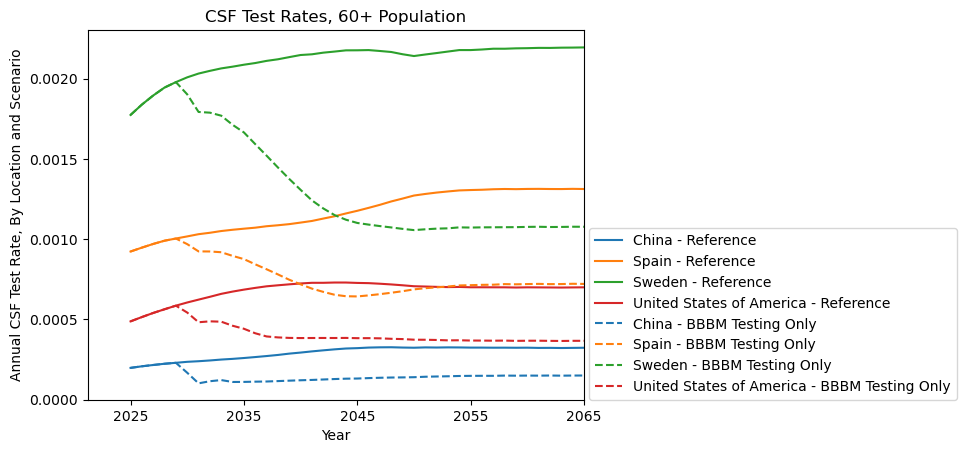

<Figure size 640x480 with 0 Axes>

In [24]:
base_csf = filter_results(
    res2,
    ["Year"],
    location=["United States of America", "Spain", "Sweden", "China"],
    sex=["Both"],
    age=["60_plus"],
    measure=[
        "CSF Tests",
    ],
    metric=["Rate"],
    scenario=["Reference"],
).drop(["Measure"] + UI_COLS, axis=1)
base_csf = base_csf.groupby(base_csf.columns.drop("Mean").tolist()).sum().reset_index()
test_csf = filter_results(
    res2,
    ["Year"],
    location=["United States of America", "Spain", "Sweden", "China"],
    sex=["Both"],
    age=["60_plus"],
    measure=[
        "CSF Tests",
    ],
    metric=["Rate"],
    scenario=["BBBM Testing Only"],
).drop(["Measure"] + UI_COLS, axis=1)
test_csf = test_csf.groupby(test_csf.columns.drop("Mean").tolist()).sum().reset_index()
base_csf["Plot"] = (
    base_csf["Location"].astype(str) + " - " + base_csf["Scenario"].astype(str)
)
test_csf["Plot"] = (
    test_csf["Location"].astype(str) + " - " + test_csf["Scenario"].astype(str)
)
display(pd.concat([base_csf, test_csf]))
make_forecast_plot(
    pd.concat([base_csf, test_csf]),
    "CSF Test Rates, 60+ Population",
    "Annual CSF Test Rate, By Location and Scenario",
    "Plot",
    show=False,
)

ax = plt.gca()

# assumes reference and testing lines are plotted in same location order (ref first)
for idx, line in enumerate(ax.lines[len(ax.lines) // 2 :]):
    ref_line = ax.lines[idx]  # idx starts from 0
    line.set_color(ref_line.get_color())
    line.set_linestyle("--")

plt.legend(loc=(1.01, 0))
plt.figure()

Year                  Location      Age   Sex           Scenario Metric  \
0    2025                     China  60_plus  Both          Reference   Rate   
1    2025                     Spain  60_plus  Both          Reference   Rate   
2    2025                    Sweden  60_plus  Both          Reference   Rate   
3    2025  United States of America  60_plus  Both          Reference   Rate   
4    2026                     China  60_plus  Both          Reference   Rate   
..    ...                       ...      ...   ...                ...    ...   
299  2099  United States of America  60_plus  Both  BBBM Testing Only   Rate   
300  2100                     China  60_plus  Both  BBBM Testing Only   Rate   
301  2100                     Spain  60_plus  Both  BBBM Testing Only   Rate   
302  2100                    Sweden  60_plus  Both  BBBM Testing Only   Rate   
303  2100  United States of America  60_plus  Both  BBBM Testing Only   Rate   

         Mean                                          Plot  
0    0.000286                             China - Reference  
1    0.001007                             Spain - Reference  
2    0.000204                            Sweden - Reference  
3    0.000704          United States of America - Reference  
4    0.000299                             China - Reference  
..        ...                                           ...  
299  0.000525  United States of America - BBBM Testing Only  
300  0.000217                     China - BBBM Testing Only  
301  0.000786                     Spain - BBBM Testing Only  
302  0.000124                    Sweden - BBBM Testing Only  
303  0.000525  United States of America - BBBM Testing Only  

[608 rows x 8 columns]

<Figure size 640x480 with 0 Axes>

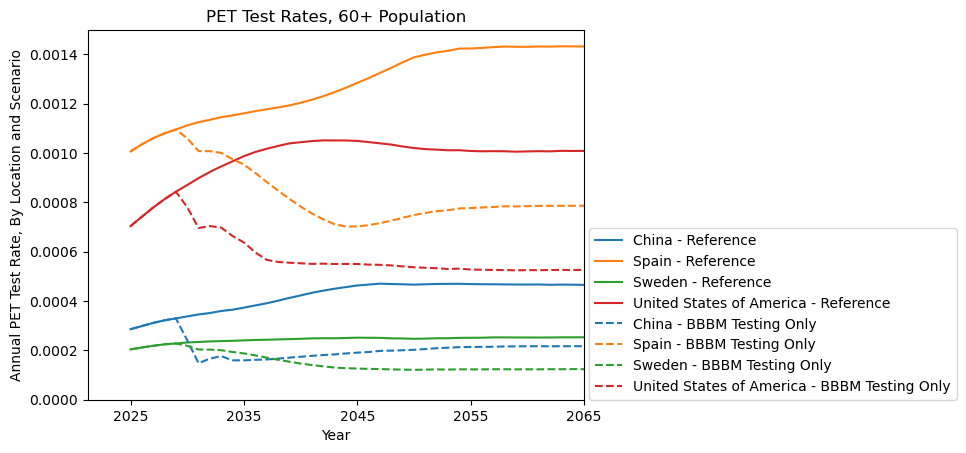

<Figure size 640x480 with 0 Axes>

In [25]:
base_pet = filter_results(
    res2,
    ["Year"],
    location=["United States of America", "Spain", "Sweden", "China"],
    sex=["Both"],
    age=["60_plus"],
    measure=[
        "PET Tests",
    ],
    metric=["Rate"],
    scenario=["Reference"],
).drop(["Measure"] + UI_COLS, axis=1)
base_pet = base_pet.groupby(base_pet.columns.drop("Mean").tolist()).sum().reset_index()
test_pet = filter_results(
    res2,
    ["Year"],
    location=["United States of America", "Spain", "Sweden", "China"],
    sex=["Both"],
    age=["60_plus"],
    measure=[
        "PET Tests",
    ],
    metric=["Rate"],
    scenario=["BBBM Testing Only"],
).drop(["Measure"] + UI_COLS, axis=1)
test_pet = test_pet.groupby(test_pet.columns.drop("Mean").tolist()).sum().reset_index()
base_pet["Plot"] = (
    base_pet["Location"].astype(str) + " - " + base_pet["Scenario"].astype(str)
)
test_pet["Plot"] = (
    test_pet["Location"].astype(str) + " - " + test_pet["Scenario"].astype(str)
)
display(pd.concat([base_pet, test_pet]))
make_forecast_plot(
    pd.concat([base_pet, test_pet]),
    "PET Test Rates, 60+ Population",
    "Annual PET Test Rate, By Location and Scenario",
    "Plot",
    show=False,
)

ax = plt.gca()

# assumes reference and testing lines are plotted in same location order (ref first)
for idx, line in enumerate(ax.lines[len(ax.lines) // 2 :]):
    ref_line = ax.lines[idx]  # idx starts from 0
    line.set_color(ref_line.get_color())
    line.set_linestyle("--")

plt.legend(loc=(1.01, 0))
plt.figure()

In [26]:
# COMBINING REQUIRES ADDITIONAL CALCULATIONS FOR UNCERTAINTY

# mixed_combined = mixed
# mixed_combined["Measure"] = mixed_combined["Measure"].replace(
#    {
#        "CSF Tests - Testing Scenario": "CSF/PET Tests - Testing Scenario",
#        "PET Tests - Testing Scenario": "CSF/PET Tests - Testing Scenario",
#        "CSF Tests - Reference Scenario": "CSF/PET Tests - Reference Scenario",
#        "PET Tests - Reference Scenario": "CSF/PET Tests - Reference Scenario",
#    }
# )
# make_forecast_plot(
#    mixed_combined.groupby(mixed_combined.columns.drop(["Mean", "95% UI Lower", "95% UI Upper"]).tolist()).sum()),
#    "US CSF/PET Tests, By Scenario (95% UI)",
#    "Annual Test Count",
#    "Measure",
# )

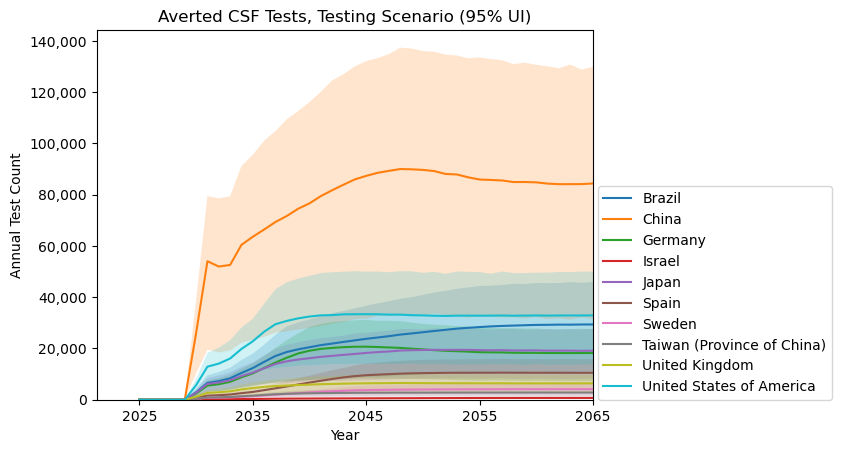

<Figure size 640x480 with 0 Axes>

In [27]:
make_forecast_plot(
    filter_results(
        res2,
        ["Year", "Location"],
        measure=["Averted CSF Tests"],
        scenario=["BBBM Testing Only"],
    ),
    "Averted CSF Tests, Testing Scenario (95% UI)",
    "Annual Test Count",
)

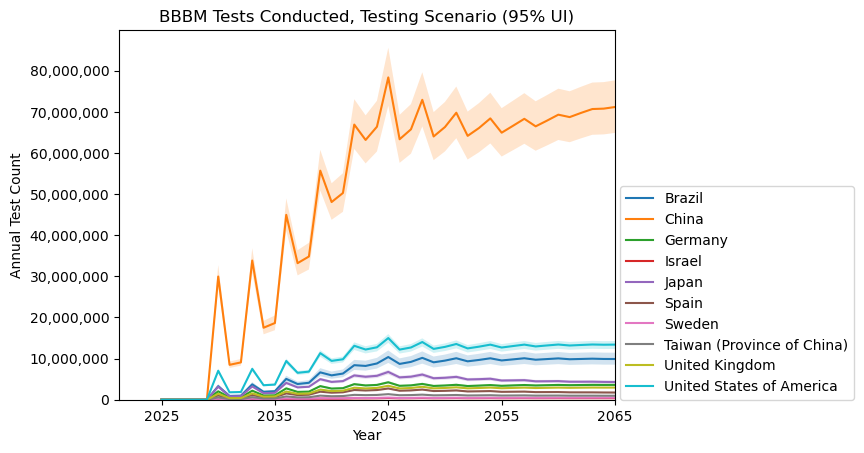

<Figure size 640x480 with 0 Axes>

In [28]:
make_forecast_plot(
    filter_results(
        res2,
        ["Year", "Location"],
        measure=["BBBM Tests"],
        scenario=["BBBM Testing and Treatment"],
    ),
    "BBBM Tests Conducted, Testing Scenario (95% UI)",
    "Annual Test Count",
)

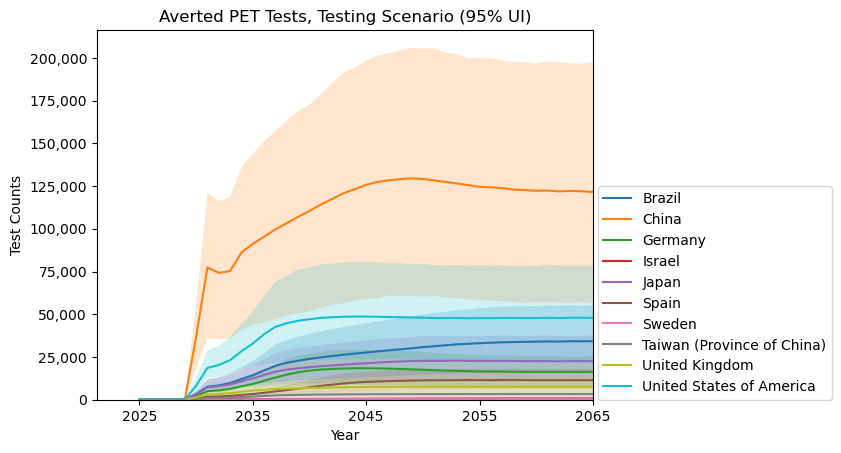

<Figure size 640x480 with 0 Axes>

In [29]:
make_forecast_plot(
    filter_results(
        res2,
        ["Year", "Location"],
        measure=["Averted PET Tests"],
        scenario=["BBBM Testing Only"],
    ),
    "Averted PET Tests, Testing Scenario (95% UI)",
    "Test Counts",
)

In [79]:
res2[
    (res2["Year"] == 2100)
    & (res2["Location"] == "United States of America")
    & (res2["Age"] == "60_plus")
    & (res2["Sex"] == "Both")
    & (res2["Disease Stage"] == "Preclinical AD")
    & (res2["Scenario"] == "BBBM Testing Only")
    & (res2["Measure"] == "Positive BBBM Tests")
    & (res2["Metric"] == "Number")
]

Year                  Location      Age   Sex   Disease Stage  \
209747  2100  United States of America  60_plus  Both  Preclinical AD   

                 Scenario              Measure  Metric           Mean  \
209747  BBBM Testing Only  Positive BBBM Tests  Number  230102.456872   

         95% UI Lower   95% UI Upper  
209747  190428.638139  283539.780961

In [30]:
# PPV, true pos, false neg estimated for now
def get_true_pos(strat_col="Measure"):
    # True Pos = Positive in Preclinical state
    pos_sim = filter_results(
        res2,
        ["Year", strat_col],
        location=["United States of America"],
        scenario=["BBBM Testing Only"],
        stage=[
            "Preclinical AD",
            "MCI due to AD",
            "AD Dementia",
        ],  # should only be in preclinical state
        measure=["Positive BBBM Tests"],
    ).drop(["Measure", "Disease Stage", "95% UI Lower", "95% UI Upper"], axis=1)
    pos_sim = pos_sim.set_index(pos_sim.columns.drop("Mean").tolist())
    return pos_sim


def get_false_neg(strat_col="Measure"):
    # False Neg = Negative in Preclinical state
    all_preclinical = filter_results(
        res2,
        ["Year", strat_col],
        location=["United States of America"],
        scenario=["BBBM Testing Only"],
        stage=[
            "Preclinical AD",
            "MCI due to AD",
            "AD Dementia",
        ],  # should only be in preclinical state
        measure=["BBBM Tests"],
    ).drop(["Measure", "Disease Stage", "95% UI Lower", "95% UI Upper"], axis=1)
    all_preclinical = all_preclinical.set_index(
        all_preclinical.columns.drop("Mean").tolist()
    )
    # all preclinical - positive preclinical
    return all_preclinical - get_true_pos(strat_col)


def get_false_pos(strat_col="Measure"):
    # False Pos = Positive in Susceptible state
    pos_susc = filter_results(
        res2,
        ["Year", strat_col],
        location=["United States of America"],
        scenario=["BBBM Testing Only"],
        stage=["Susceptible"],
        measure=["Positive BBBM Tests"],
    )
    pos_susc = pos_susc.drop(
        ["Measure", "Disease Stage", "95% UI Lower", "95% UI Upper"], axis=1
    )

    pos_susc = pos_susc.set_index(pos_susc.columns.drop("Mean").tolist())
    return pos_susc


def get_true_neg(strat_col="Measure"):
    # True Neg = Negative in Susceptible state
    # outside sim negatives = outside sim tests - outside sim positives

    all_susc = filter_results(
        res2,
        ["Year", strat_col],
        location=["United States of America"],
        scenario=["BBBM Testing Only"],
        stage=["Susceptible"],
        measure=["BBBM Tests"],
    )
    all_susc = all_susc.drop(
        ["Measure", "Disease Stage", "95% UI Lower", "95% UI Upper"], axis=1
    )

    all_susc = all_susc.set_index(all_susc.columns.drop("Mean").tolist())

    # all suseptible - positive susceptible
    return all_susc - get_false_pos(strat_col)


def calc_ppv(strat_col="Measure"):
    true_pos = get_true_pos(strat_col)
    ppv = true_pos / (get_false_pos(strat_col) + true_pos)
    ppv = ppv.reset_index()
    ppv["Measure"] = "Positive Predictive Value"
    return ppv


def concat_all_tests(strat_col="Measure"):
    true_pos = get_true_pos(strat_col).reset_index()
    true_pos["Measure"] = "True Positive BBBM Tests"
    false_pos = get_false_pos(strat_col).reset_index()
    false_pos["Measure"] = "False Positive BBBM Tests"
    true_neg = get_true_neg(strat_col).reset_index()
    true_neg["Measure"] = "True Negative BBBM Tests"
    false_neg = get_false_neg(strat_col).reset_index()
    false_neg["Measure"] = "False Negative BBBM Tests"
    return pd.concat([true_pos, false_pos, true_neg, false_neg])

In [31]:
get_true_neg()

Mean
Year Location                 Scenario          Metric              
2025 United States of America BBBM Testing Only Number  0.000000e+00
2026 United States of America BBBM Testing Only Number  0.000000e+00
2027 United States of America BBBM Testing Only Number  0.000000e+00
2028 United States of America BBBM Testing Only Number  0.000000e+00
2029 United States of America BBBM Testing Only Number  0.000000e+00
...                                                              ...
2096 United States of America BBBM Testing Only Number  1.186904e+07
2097 United States of America BBBM Testing Only Number  1.186904e+07
2098 United States of America BBBM Testing Only Number  1.186904e+07
2099 United States of America BBBM Testing Only Number  1.186904e+07
2100 United States of America BBBM Testing Only Number  1.186904e+07

[76 rows x 1 columns]

Year                  Location           Scenario  Metric  \
148  2099  United States of America  BBBM Testing Only  Number   
149  2099  United States of America  BBBM Testing Only  Number   

                 Measure          Mean  
148  Negative BBBM Tests  1.189462e+07  
149  Positive BBBM Tests  1.548813e+06

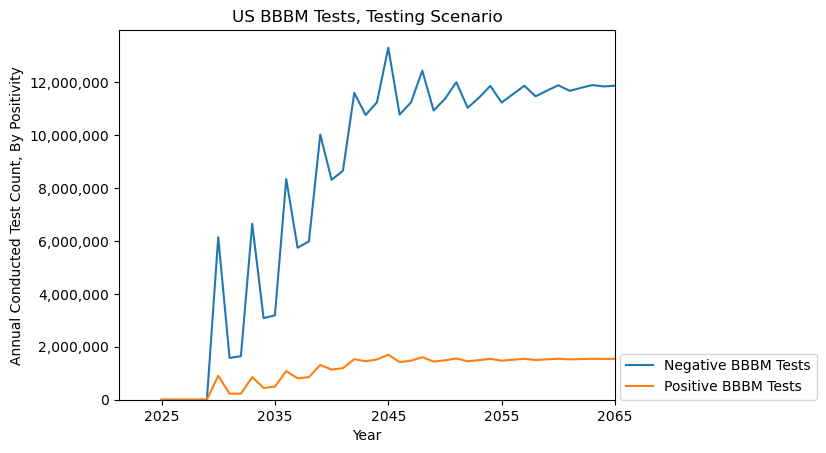

<Figure size 640x480 with 0 Axes>

In [32]:
# This ignores out of sim tests
# make_forecast_plot(
#     filter_results(
#         res2,
#         ["Year"],
#         location=["United States of America"],
#         measure=["BBBM Tests"],
#         scenario=["BBBM Testing and Treatment"],
#     ),
#     "US BBBM Tests, Testing Scenario (95% UI)",
#     "Annual Conducted Test Count",
#     "Measure",
# )

df = concat_all_tests()
df["Measure"] = df["Measure"].replace(
    {
        "True Positive BBBM Tests": "Positive BBBM Tests",
        "False Positive BBBM Tests": "Positive BBBM Tests",
        "True Negative BBBM Tests": "Negative BBBM Tests",
        "False Negative BBBM Tests": "Negative BBBM Tests",
    }
)
# tmp = df.groupby(list(df.columns.difference(["Mean"], sort=False))).sum().reset_index()
make_forecast_plot(
    df.groupby(list(df.columns.difference(["Mean"], sort=False))).sum().reset_index(),
    "US BBBM Tests, Testing Scenario",
    "Annual Conducted Test Count, By Positivity",
    "Measure",
)
tmp = df.groupby(list(df.columns.difference(["Mean"], sort=False))).sum().reset_index()
tmp[tmp["Year"] == 2099]

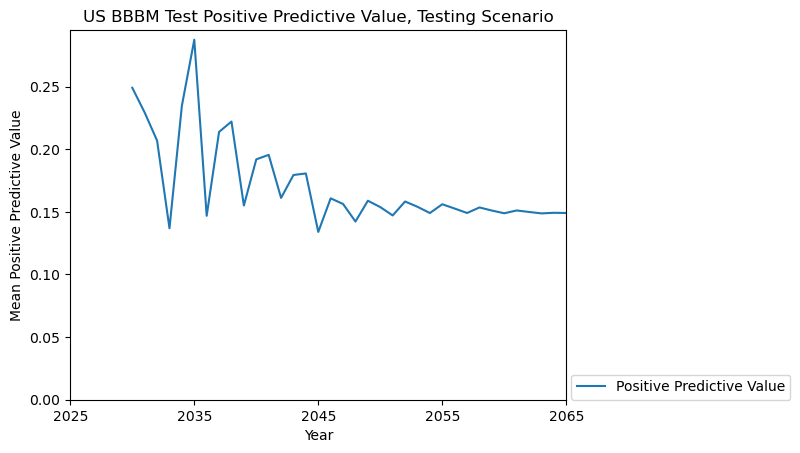

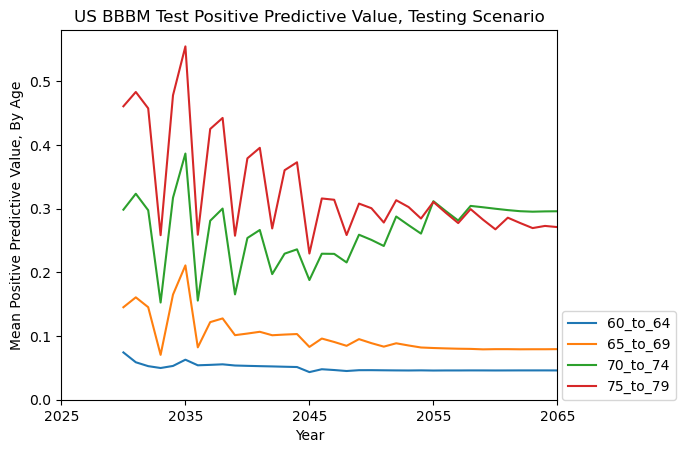

<Figure size 640x480 with 0 Axes>

In [59]:
make_forecast_plot(
    calc_ppv("Measure"),
    "US BBBM Test Positive Predictive Value, Testing Scenario",
    "Mean Positive Predictive Value",
    "Measure",
)
make_forecast_plot(
    calc_ppv("Age"),
    "US BBBM Test Positive Predictive Value, Testing Scenario",
    "Mean Positive Predictive Value, By Age",
    "Age",
)

# TBD need to filter by stage once Testing Only scenario includes susceptible tests

Year                  Location       Age           Scenario  Metric  \
160  2065  United States of America  60_to_64  BBBM Testing Only  Number   
161  2065  United States of America  65_to_69  BBBM Testing Only  Number   
162  2065  United States of America  70_to_74  BBBM Testing Only  Number   
163  2065  United States of America  75_to_79  BBBM Testing Only  Number   

         Mean                    Measure  
160  0.045997  Positive Predictive Value  
161  0.079428  Positive Predictive Value  
162  0.295946  Positive Predictive Value  
163  0.271094  Positive Predictive Value

(0.0, 100.0)

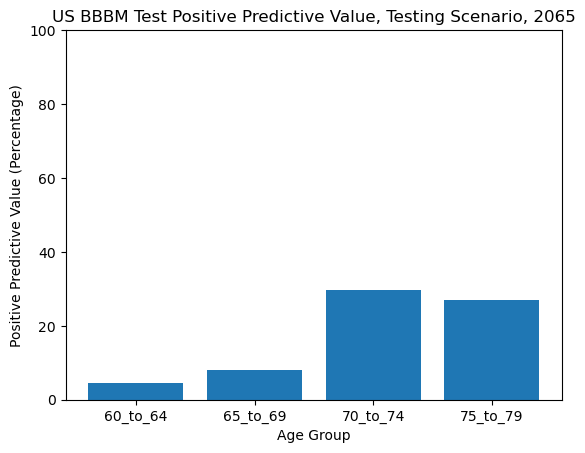

In [ ]:
# df = calc_ppv("Age").drop("Year", axis=1)
# df = df.groupby(list(df.columns.difference(["Mean"], sort=False))).mean().reset_index()
df = calc_ppv("Age")
df = df[df["Year"] == 2065]
df = df[df["Age"] != "60_plus"]
display(df)

plt.bar(df["Age"], df["Mean"] * 100)
plt.xlabel("Age Group")
plt.ylabel("Positive Predictive Value (Percentage)")
plt.title("US BBBM Test Positive Predictive Value, Testing Scenario, 2065")
plt.ylim(0, 100)

Year                  Location       Age           Scenario  Metric  \
20  2030  United States of America  60_to_64  BBBM Testing Only  Number   
21  2030  United States of America  65_to_69  BBBM Testing Only  Number   
22  2030  United States of America  70_to_74  BBBM Testing Only  Number   
23  2030  United States of America  75_to_79  BBBM Testing Only  Number   

        Mean                    Measure  
20  0.074272  Positive Predictive Value  
21  0.145225  Positive Predictive Value  
22  0.298431  Positive Predictive Value  
23  0.460819  Positive Predictive Value

(0.0, 100.0)

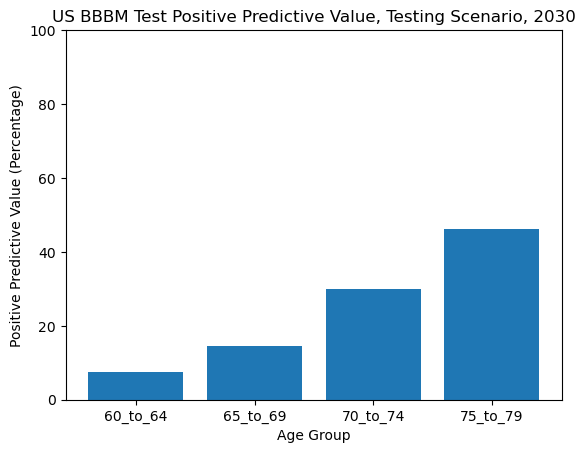

In [58]:
df = calc_ppv("Age")
df = df[df["Year"] == 2030]
df = df[df["Age"] != "60_plus"]
display(df)

plt.bar(df["Age"], df["Mean"] * 100)
plt.xlabel("Age Group")
plt.ylabel("Positive Predictive Value (Percentage)")
plt.title("US BBBM Test Positive Predictive Value, Testing Scenario, 2030")
plt.ylim(0, 100)  

Year                  Location           Scenario  Metric  \
22    2025  United States of America  BBBM Testing Only  Number   
62    2026  United States of America  BBBM Testing Only  Number   
102   2027  United States of America  BBBM Testing Only  Number   
142   2028  United States of America  BBBM Testing Only  Number   
182   2029  United States of America  BBBM Testing Only  Number   
...    ...                       ...                ...     ...   
2862  2096  United States of America  BBBM Testing Only  Number   
2902  2097  United States of America  BBBM Testing Only  Number   
2942  2098  United States of America  BBBM Testing Only  Number   
2982  2099  United States of America  BBBM Testing Only  Number   
3022  2100  United States of America  BBBM Testing Only  Number   

               Mean                   Measure  
22         0.000000  True Positive BBBM Tests  
62         0.000000  True Positive BBBM Tests  
102        0.000000  True Positive BBBM Tests  
142        0.000000  True Positive BBBM Tests  
182        0.000000  True Positive BBBM Tests  
...             ...                       ...  
2862  230618.964303  True Positive BBBM Tests  
2902  229909.536558  True Positive BBBM Tests  
2942  230484.840221  True Positive BBBM Tests  
2982  230030.294413  True Positive BBBM Tests  
3022  230102.456872  True Positive BBBM Tests  

[76 rows x 6 columns]

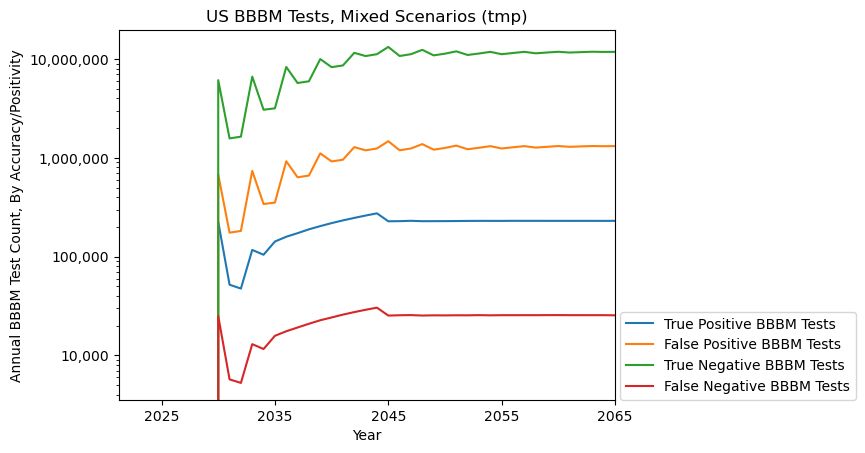

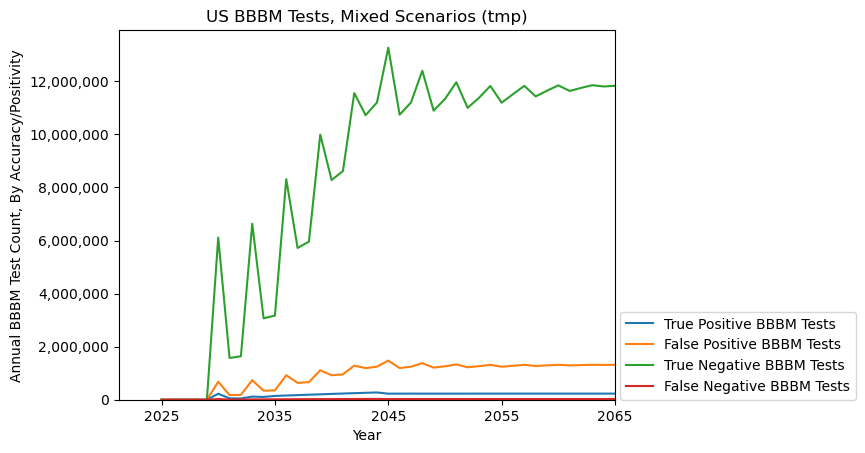

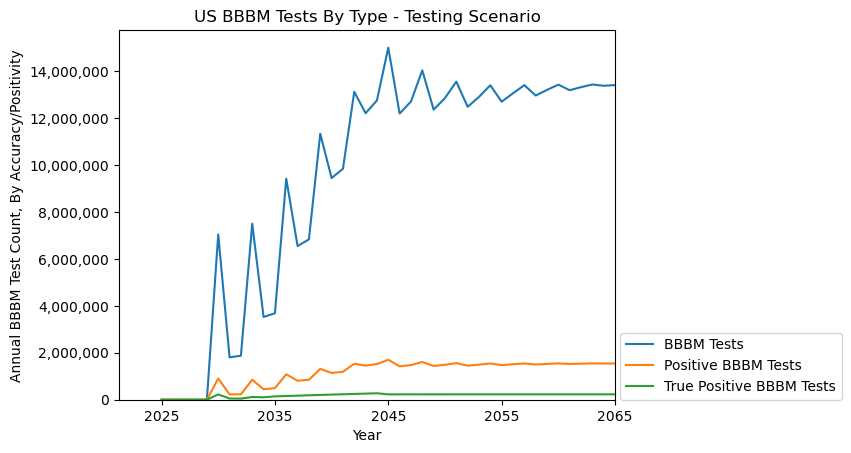

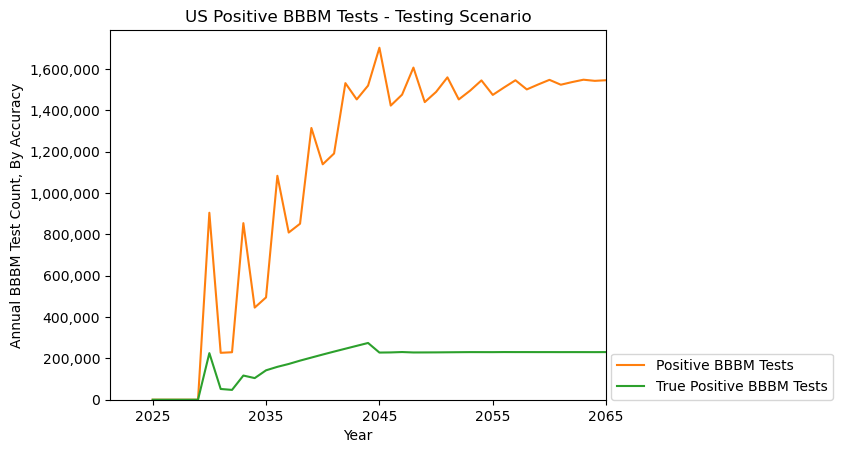

<Figure size 640x480 with 0 Axes>

In [74]:
# Test accuracy by stage (outside vs inside sim)

# Inside sim- stage=preclinical, positive vs negative
# true pos vs false neg

# Outside sim- stage=susceptible, positive vs negative
# false pos vs true neg
make_forecast_plot(
    concat_all_tests(),
    "US BBBM Tests, Mixed Scenarios (tmp)",
    "Annual BBBM Test Count, By Accuracy/Positivity",
    "Measure",
    scale="log",
)

make_forecast_plot(
    concat_all_tests(),
    "US BBBM Tests, Mixed Scenarios (tmp)",
    "Annual BBBM Test Count, By Accuracy/Positivity",
    "Measure",
)


all = filter_results(
    res2,
    ["Year"],
    location=["United States of America"],
    scenario=["BBBM Testing Only"],
    measure=["BBBM Tests"],
).drop(["Measure", "95% UI Lower", "95% UI Upper"], axis=1)

pos = filter_results(
    res2,
    ["Year"],
    location=["United States of America"],
    scenario=["BBBM Testing Only"],
    measure=["Positive BBBM Tests", "Positive BBBM Tests"],
).drop(["Measure", "95% UI Lower", "95% UI Upper"], axis=1)
pos = pos.groupby(pos.columns.drop("Mean").tolist()).sum().reset_index()

true_pos = filter_results(
    res2,
    ["Year"],
    location=["United States of America"],
    scenario=["BBBM Testing Only"],
    stage=[
        "Preclinical AD",
        "MCI due to AD",
        "AD Dementia",
    ],  # should only be in preclinical state
    measure=["Positive BBBM Tests"],
).drop(["Measure", "Disease Stage", "95% UI Lower", "95% UI Upper"], axis=1)

all["Measure"] = "BBBM Tests"
pos["Measure"] = "Positive BBBM Tests"
true_pos["Measure"] = "True Positive BBBM Tests"
df = pd.concat([all, pos, true_pos])

# TODO: label highest points with dot and value, can include uncertainty
make_forecast_plot(
    df,
    "US BBBM Tests By Type - Testing Scenario",
    "Annual BBBM Test Count, By Accuracy/Positivity",
    "Measure",
)
save_for_maxes = df
df = pd.concat([pos, true_pos])
make_forecast_plot(
    df,
    "US Positive BBBM Tests - Testing Scenario",
    "Annual BBBM Test Count, By Accuracy",
    "Measure",
    colors=["tab:orange", "tab:green"],
)
df[df["Measure"] == "True Positive BBBM Tests"]

In [66]:
df = save_for_maxes
tests = df[df["Measure"] == "BBBM Tests"]
positives = df[df["Measure"] == "Positive BBBM Tests"]
true_positives = df[df["Measure"] == "True Positive BBBM Tests"]

display(tests.iloc[tests["Mean"].idxmax()])
display(positives.iloc[positives["Mean"].idxmax()])
display(true_positives[true_positives["Mean"].idxmax()])

IndexError: single positional indexer is out-of-bounds

In [36]:
# Pop 60-65 * 60% * 90% * 1/3 = true negative tests
# True negative increase?

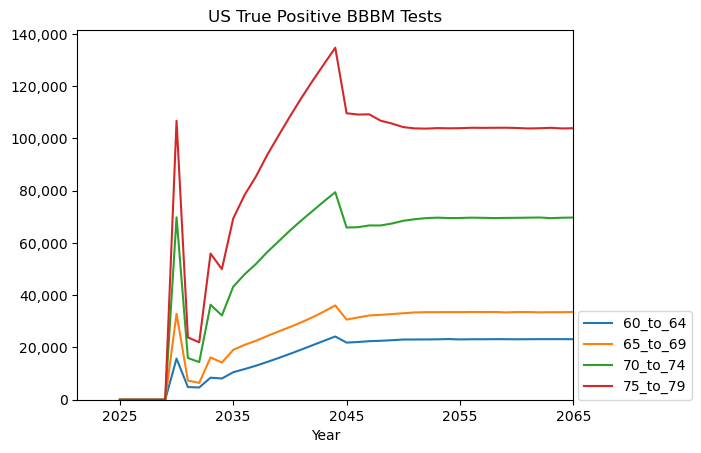

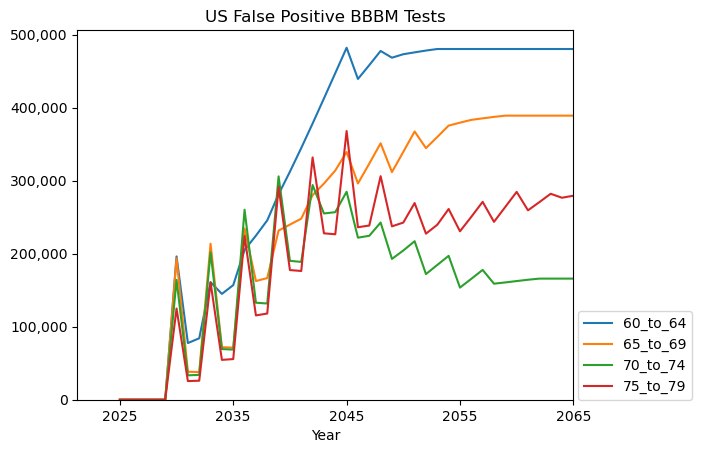

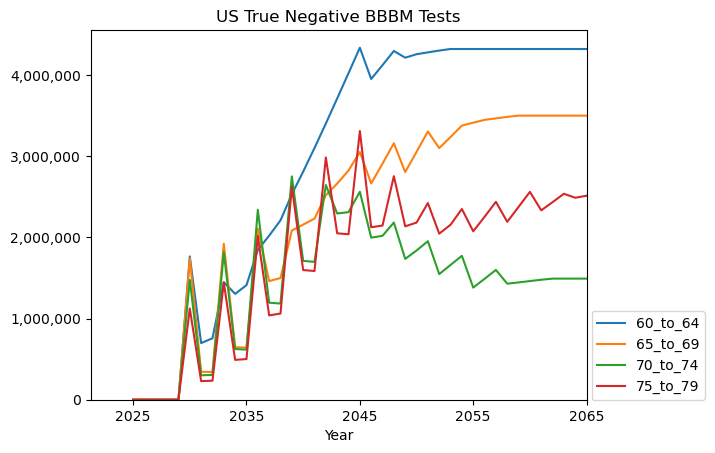

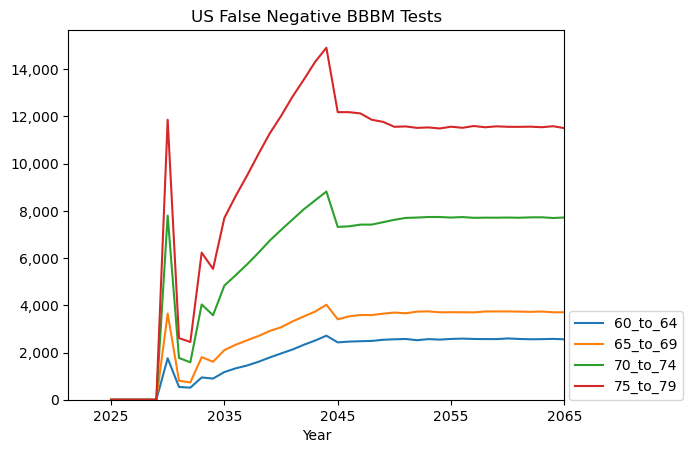

<Figure size 640x480 with 0 Axes>

In [37]:
make_forecast_plot(
    get_true_pos("Age").reset_index(), "US True Positive BBBM Tests", "", "Age"
)
# also plot US population with these age groups to check false positive age group order (inside sim vs outsdie sim, also PPV)
make_forecast_plot(
    get_false_pos("Age").reset_index(), "US False Positive BBBM Tests", "", "Age"
)
make_forecast_plot(
    get_true_neg("Age").reset_index(), "US True Negative BBBM Tests", "", "Age"
)
make_forecast_plot(
    get_false_neg("Age").reset_index(), "US False Negative BBBM Tests", "", "Age"
)

In [80]:
art = Artifact(
    "/mnt/team/simulation_science/pub/models/vivarium_csu_alzheimers/artifacts/model8.3/united_states_of_america.hdf"
)
df = art.load("population.structure").mean(axis=1)
df = df.reset_index()

In [86]:
df[
    (df["year_start"] == 2050)
    # & (df["sex"] == "Female")
    & (df["age_start"] >= 60)
    & (df["age_start"] < 80)
][0].sum()

71772396.44467545

# Treatment

In [299]:
dalys = pd.read_csv(Path(results_dir_new) / "dalys.csv")
deaths = pd.read_csv(Path(results_dir_new) / "deaths.csv")
medication = pd.read_csv(Path(results_dir_new) / "medication.csv")
res3 = pd.concat([dalys, deaths, medication])
display(res3["Measure"].unique())
res3

array(['DALYs Associated with AD', 'Averted DALYs Associated with AD',
       'Deaths Associated with AD', 'Averted Deaths Associated with AD',
       'Medication Completion', 'Medication Discontinuation',
       'Medication Initiation'], dtype=object)

Year                  Location       Age     Sex   Disease Stage  \
0       2025                    Brazil  60_to_64  Female  Preclinical AD   
1       2025                    Brazil  60_to_64    Male  Preclinical AD   
2       2025                    Brazil  60_to_64    Both  Preclinical AD   
3       2025                    Brazil  60_to_64  Female  Preclinical AD   
4       2025                    Brazil  60_to_64    Male  Preclinical AD   
...      ...                       ...       ...     ...             ...   
291835  2100  United States of America   60_plus    Male     Susceptible   
291836  2100  United States of America   60_plus    Both     Susceptible   
291837  2100  United States of America   60_plus  Female     Susceptible   
291838  2100  United States of America   60_plus    Male     Susceptible   
291839  2100  United States of America   60_plus    Both     Susceptible   

                          Scenario                   Measure  Metric  \
0                        Reference  DALYs Associated with AD  Number   
1                        Reference  DALYs Associated with AD  Number   
2                        Reference  DALYs Associated with AD  Number   
3                BBBM Testing Only  DALYs Associated with AD  Number   
4                BBBM Testing Only  DALYs Associated with AD  Number   
...                            ...                       ...     ...   
291835           BBBM Testing Only     Medication Initiation    Rate   
291836           BBBM Testing Only     Medication Initiation    Rate   
291837  BBBM Testing and Treatment     Medication Initiation    Rate   
291838  BBBM Testing and Treatment     Medication Initiation    Rate   
291839  BBBM Testing and Treatment     Medication Initiation    Rate   

            Mean  95% UI Lower  95% UI Upper  
0       0.000000      0.000000      0.000000  
1       0.000000      0.000000      0.000000  
2       0.000000      0.000000      0.000000  
3       0.000000      0.000000      0.000000  
4       0.000000      0.000000      0.000000  
...          ...           ...           ...  
291835  0.000000      0.000000      0.000000  
291836  0.000000      0.000000      0.000000  
291837  0.003817      0.003753      0.003867  
291838  0.004197      0.004170      0.004223  
291839  0.003991      0.003951      0.004026  

[1751040 rows x 11 columns]

In [300]:
# Check 2099 vs 2100 data
display(
    res3[
        (res3["Year"] == 2099)
        & ((res3["Age"] == "70_to_74") | (res3["Age"] == "70_to_75"))
        & (res3["Location"] == "United States of America")
        & (res3["Sex"] == "Female")
    ]
)
display(
    res3[
        (res3["Year"] == 2100)
        & ((res3["Age"] == "70_to_74") | (res3["Age"] == "70_to_75"))
        & (res3["Location"] == "United States of America")
        & (res3["Sex"] == "Female")
    ]
)

Year                  Location       Age     Sex   Disease Stage  \
200580  2099  United States of America  70_to_74  Female  Preclinical AD   
200583  2099  United States of America  70_to_74  Female  Preclinical AD   
200586  2099  United States of America  70_to_74  Female  Preclinical AD   
200589  2099  United States of America  70_to_74  Female  Preclinical AD   
200592  2099  United States of America  70_to_74  Female  Preclinical AD   
...      ...                       ...       ...     ...             ...   
140817  2099  United States of America  70_to_74  Female  Preclinical AD   
150348  2099  United States of America  70_to_74  Female     Susceptible   
150351  2099  United States of America  70_to_74  Female     Susceptible   
150354  2099  United States of America  70_to_74  Female     Susceptible   
150357  2099  United States of America  70_to_74  Female     Susceptible   

                          Scenario                   Measure  Metric  \
200580                   Reference  DALYs Associated with AD  Number   
200583           BBBM Testing Only  DALYs Associated with AD  Number   
200586  BBBM Testing and Treatment  DALYs Associated with AD  Number   
200589                   Reference  DALYs Associated with AD    Rate   
200592           BBBM Testing Only  DALYs Associated with AD    Rate   
...                            ...                       ...     ...   
140817  BBBM Testing and Treatment     Medication Initiation    Rate   
150348           BBBM Testing Only     Medication Initiation  Number   
150351  BBBM Testing and Treatment     Medication Initiation  Number   
150354           BBBM Testing Only     Medication Initiation    Rate   
150357  BBBM Testing and Treatment     Medication Initiation    Rate   

                Mean  95% UI Lower  95% UI Upper  
200580      0.000000      0.000000      0.000000  
200583      0.000000      0.000000      0.000000  
200586      0.000000      0.000000      0.000000  
200589      0.000000      0.000000      0.000000  
200592      0.000000      0.000000      0.000000  
...              ...           ...           ...  
140817      0.000732      0.000110      0.001769  
150348      0.000000      0.000000      0.000000  
150351  25749.976049  23901.103399  27188.725440  
150354      0.000000      0.000000      0.000000  
150357      0.002869      0.002848      0.002889  

[62 rows x 11 columns]

Year                  Location       Age     Sex   Disease Stage  \
200610  2100  United States of America  70_to_74  Female  Preclinical AD   
200613  2100  United States of America  70_to_74  Female  Preclinical AD   
200616  2100  United States of America  70_to_74  Female  Preclinical AD   
200619  2100  United States of America  70_to_74  Female  Preclinical AD   
200622  2100  United States of America  70_to_74  Female  Preclinical AD   
...      ...                       ...       ...     ...             ...   
141357  2100  United States of America  70_to_74  Female  Preclinical AD   
150468  2100  United States of America  70_to_74  Female     Susceptible   
150471  2100  United States of America  70_to_74  Female     Susceptible   
150474  2100  United States of America  70_to_74  Female     Susceptible   
150477  2100  United States of America  70_to_74  Female     Susceptible   

                          Scenario                   Measure  Metric  \
200610                   Reference  DALYs Associated with AD  Number   
200613           BBBM Testing Only  DALYs Associated with AD  Number   
200616  BBBM Testing and Treatment  DALYs Associated with AD  Number   
200619                   Reference  DALYs Associated with AD    Rate   
200622           BBBM Testing Only  DALYs Associated with AD    Rate   
...                            ...                       ...     ...   
141357  BBBM Testing and Treatment     Medication Initiation    Rate   
150468           BBBM Testing Only     Medication Initiation  Number   
150471  BBBM Testing and Treatment     Medication Initiation  Number   
150474           BBBM Testing Only     Medication Initiation    Rate   
150477  BBBM Testing and Treatment     Medication Initiation    Rate   

                Mean  95% UI Lower  95% UI Upper  
200610      0.000000      0.000000      0.000000  
200613      0.000000      0.000000      0.000000  
200616      0.000000      0.000000      0.000000  
200619      0.000000      0.000000      0.000000  
200622      0.000000      0.000000      0.000000  
...              ...           ...           ...  
141357      0.000729      0.000097      0.001737  
150468      0.000000      0.000000      0.000000  
150471  25749.976049  23901.103399  27188.725440  
150474      0.000000      0.000000      0.000000  
150477      0.002869      0.002848      0.002889  

[62 rows x 11 columns]

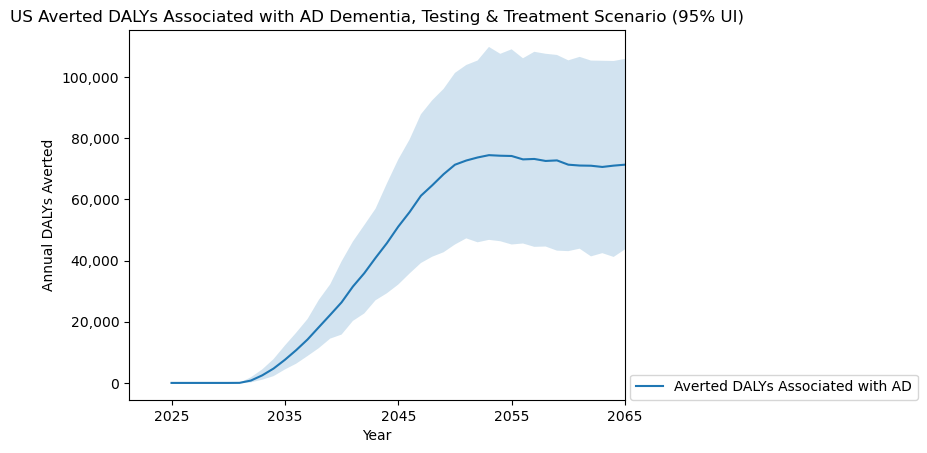

<Figure size 640x480 with 0 Axes>

In [301]:
make_forecast_plot(
    filter_results(
        res3,
        ["Year"],
        location=["United States of America"],
        measure=[
            "Averted DALYs Associated with AD",
        ],
        scenario=["BBBM Testing and Treatment"],
    ),
    "US Averted DALYs Associated with AD Dementia, Testing & Treatment Scenario (95% UI)",
    "Annual DALYs Averted",
    "Measure",
)

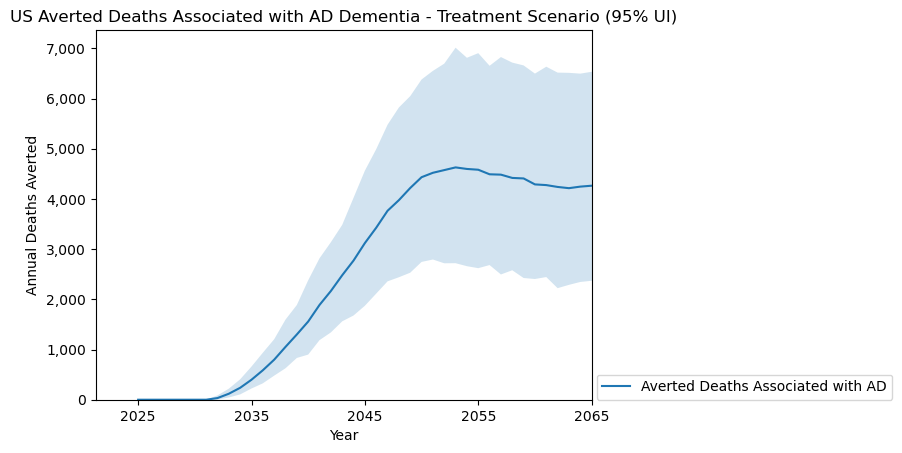

<Figure size 640x480 with 0 Axes>

In [323]:
make_forecast_plot(
    filter_results(
        res3,
        ["Year"],
        location=["United States of America"],
        measure=[
            "Averted Deaths Associated with AD",
        ],
        scenario=["BBBM Testing and Treatment"],
    ),
    "US Averted Deaths Associated with AD Dementia - Treatment Scenario (95% UI)",
    "Annual Deaths Averted",
    "Measure",
)

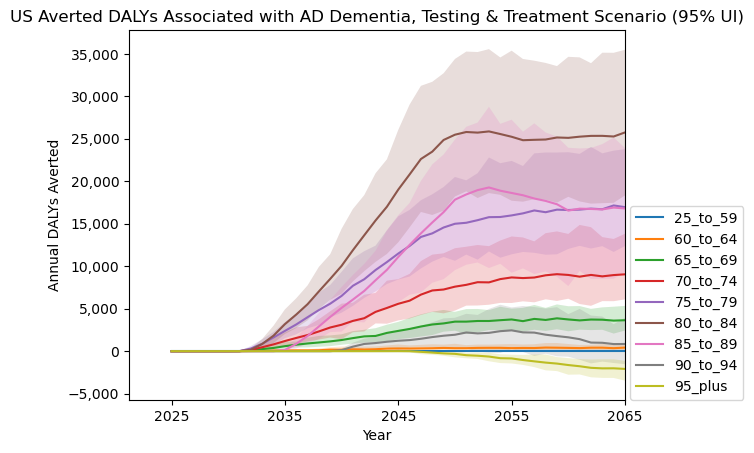

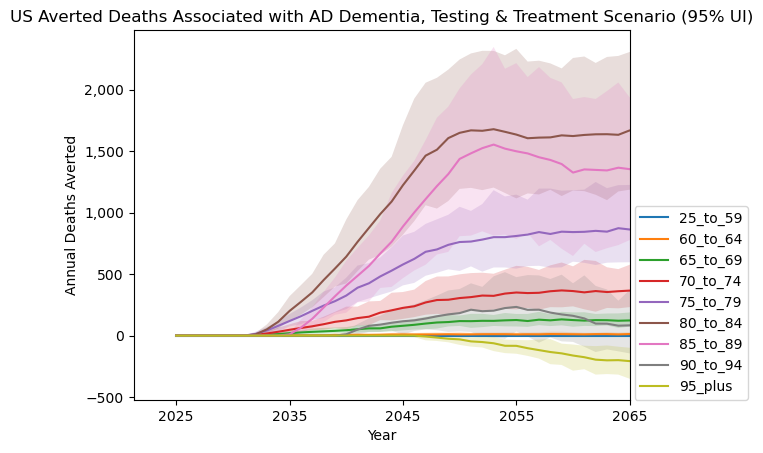

<Figure size 640x480 with 0 Axes>

In [303]:
make_forecast_plot(
    filter_results(
        res3,
        ["Year", "Age"],
        location=["United States of America"],
        measure=["Averted DALYs Associated with AD"],
        scenario=["BBBM Testing and Treatment"],
    ),
    "US Averted DALYs Associated with AD Dementia, Testing & Treatment Scenario (95% UI)",
    "Annual DALYs Averted",
    "Age",
)
make_forecast_plot(
    filter_results(
        res3,
        ["Year", "Age"],
        location=["United States of America"],
        measure=["Averted Deaths Associated with AD"],
        scenario=["BBBM Testing and Treatment"],
    ),
    "US Averted Deaths Associated with AD Dementia, Testing & Treatment Scenario (95% UI)",
    "Annual Deaths Averted",
    "Age",
)

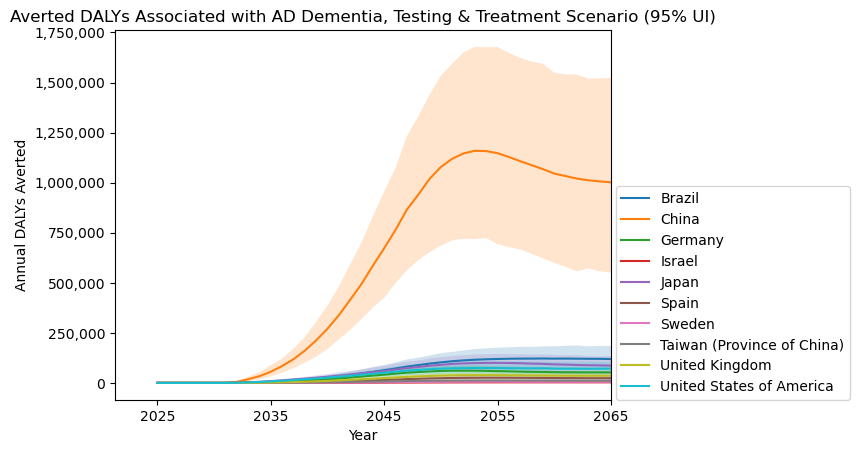

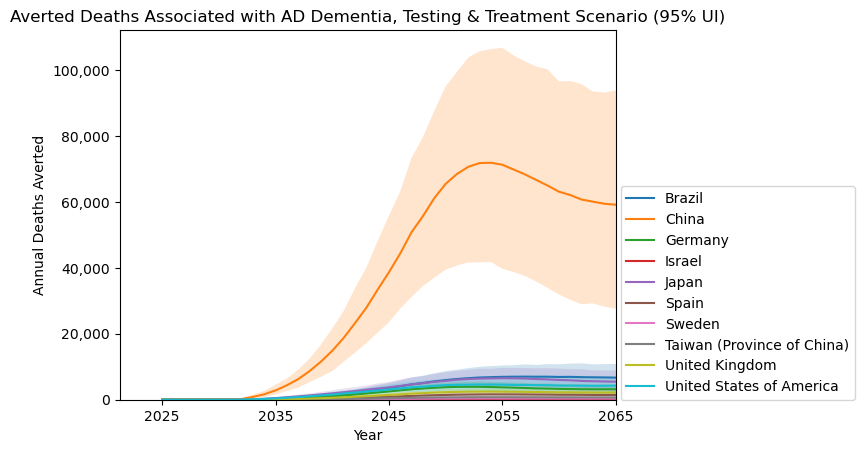

<Figure size 640x480 with 0 Axes>

In [304]:
make_forecast_plot(
    filter_results(
        res3,
        ["Year", "Location"],
        measure=[
            "Averted DALYs Associated with AD",
        ],
        scenario=["BBBM Testing and Treatment"],
    ),
    "Averted DALYs Associated with AD Dementia, Testing & Treatment Scenario (95% UI)",
    "Annual DALYs Averted",
    "Location",
)
make_forecast_plot(
    filter_results(
        res3,
        ["Year", "Location"],
        measure=[
            "Averted Deaths Associated with AD",
        ],
        scenario=["BBBM Testing and Treatment"],
    ),
    "Averted Deaths Associated with AD Dementia, Testing & Treatment Scenario (95% UI)",
    "Annual Deaths Averted",
    "Location",
)

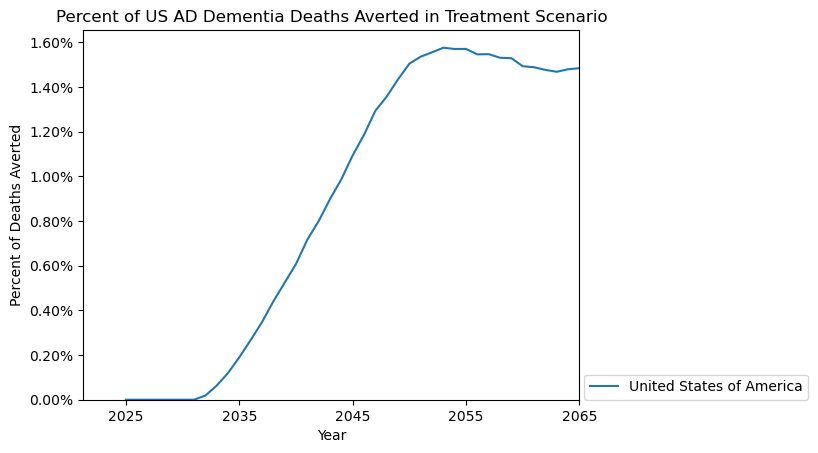

<Figure size 640x480 with 0 Axes>

In [325]:
averted = filter_results(
    res3,
    ["Year"],
    location=["United States of America"],
    measure=[
        "Averted Deaths Associated with AD",
    ],
    scenario=["BBBM Testing and Treatment"],
).drop(["Scenario", "Measure", "95% UI Lower", "95% UI Upper"], axis=1)
averted = averted.set_index(list(averted.columns.difference(["Mean"], sort=False)))
total = filter_results(
    res,
    ["Year"],
    location=["United States of America"],
    measure=["Deaths Associated with AD"],
).drop(["Scenario", "Measure", "95% UI Lower", "95% UI Upper"], axis=1)
total = total.set_index(list(total.columns.difference(["Mean"], sort=False)))
make_forecast_plot(
    (averted / total).reset_index(),
    "Percent of US AD Dementia Deaths Averted in Treatment Scenario",
    "Percent of Deaths Averted",
    "Location",
    percent=True,
)

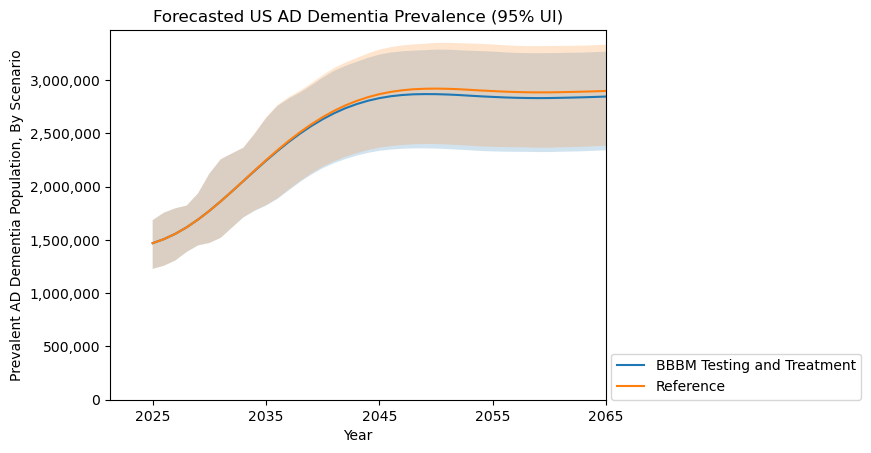

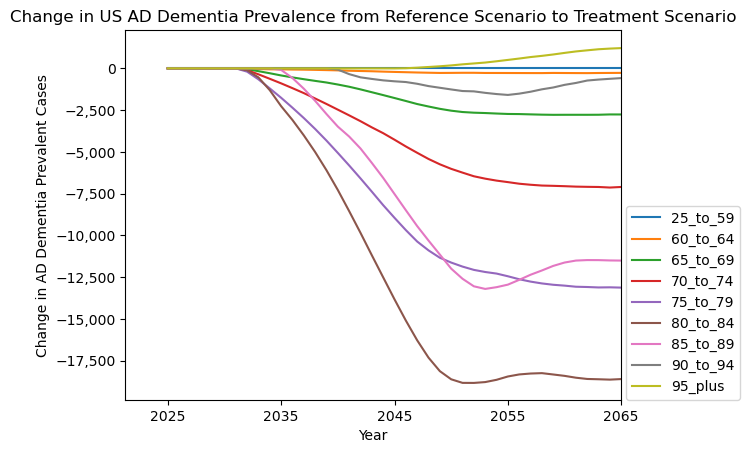

<Figure size 640x480 with 0 Axes>

In [324]:
make_forecast_plot(
    filter_results(
        res,
        ["Year", "Scenario"],
        location=["United States of America"],
        stage=["AD Dementia"],
        measure=["Prevalence"],
        scenario=["Reference", "BBBM Testing and Treatment"],
    ),
    "Forecasted US AD Dementia Prevalence (95% UI)",
    "Prevalent AD Dementia Population, By Scenario",
    "Scenario",
)
change = filter_results(
    res,
    ["Year", "Age", "Scenario"],
    age=AGES,
    location=["United States of America"],
    stage=["AD Dementia"],
    measure=["Prevalence"],
    scenario=["Reference", "BBBM Testing and Treatment"],
)
change = change.set_index(
    list(change.columns.difference(["Mean", "95% UI Lower", "95% UI Upper"]))
).unstack("Scenario")

for x in ["Mean", "95% UI Lower", "95% UI Upper"]:
    change[(x, "Difference")] = (
        change[(x, "BBBM Testing and Treatment")] - change[(x, "Reference")]
    )
    change = change.drop(
        [(x, "BBBM Testing and Treatment"), (x, "Reference")],
        axis=1,
    )
change = (
    change.droplevel("Scenario", axis=1)
    .reset_index()
    .drop(["95% UI Lower", "95% UI Upper"], axis=1)
)
make_forecast_plot(
    change,
    "Change in US AD Dementia Prevalence from Reference Scenario to Treatment Scenario",
    "Change in AD Dementia Prevalent Cases",
    "Age",
)
change = change.set_index(list(change.columns.difference(["Mean"], sort=False)))

Age Disease Stage                  Location     Measure  Metric  \
0    25_to_59   AD Dementia  United States of America  Prevalence  Number   
1    25_to_59   AD Dementia  United States of America  Prevalence  Number   
2    25_to_59   AD Dementia  United States of America  Prevalence  Number   
3    25_to_59   AD Dementia  United States of America  Prevalence  Number   
4    25_to_59   AD Dementia  United States of America  Prevalence  Number   
..        ...           ...                       ...         ...     ...   
679   95_plus   AD Dementia  United States of America  Prevalence  Number   
680   95_plus   AD Dementia  United States of America  Prevalence  Number   
681   95_plus   AD Dementia  United States of America  Prevalence  Number   
682   95_plus   AD Dementia  United States of America  Prevalence  Number   
683   95_plus   AD Dementia  United States of America  Prevalence  Number   

     Year      Mean  
0    2025  0.000000  
1    2026  0.000000  
2    2027  0.000000  
3    2028  0.000000  
4    2029  0.000000  
..    ...       ...  
679  2096  0.007841  
680  2097  0.007936  
681  2098  0.007872  
682  2099  0.007907  
683  2100  0.007893  

[684 rows x 7 columns]

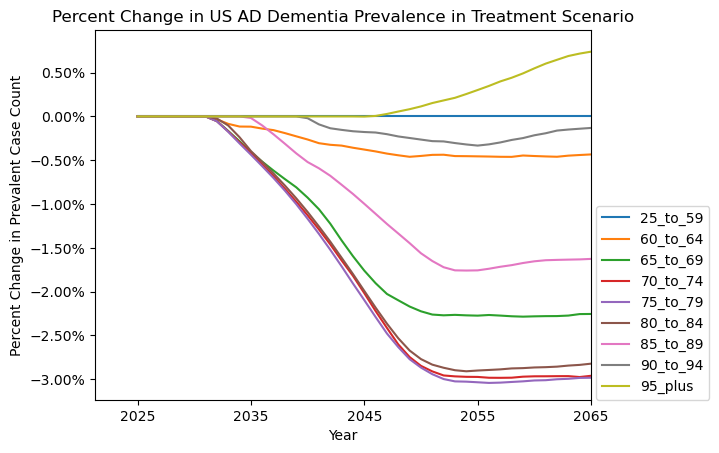

<Figure size 640x480 with 0 Axes>

In [326]:
prev = filter_results(
    res,
    ["Year", "Age"],
    age=AGES,
    location=["United States of America"],
    stage=["AD Dementia"],
    measure=["Prevalence"],
).drop(["Scenario", "95% UI Lower", "95% UI Upper"], axis=1)
prev = prev.set_index(list(prev.columns.difference(["Mean"], sort=False)))
# change = change.set_index(list(change.columns.difference(["Mean"], sort=False)))
display((change / prev).reset_index())
make_forecast_plot(
    (change / prev).reset_index(),
    "Percent Change in US AD Dementia Prevalence in Treatment Scenario",
    "Percent Change in Prevalent Case Count",
    "Age",
    percent=True,
)

Age Disease Stage Location     Measure  Metric  Year      Mean
0    25_to_59   AD Dementia   Brazil  Prevalence  Number  2025  0.000000
1    25_to_59   AD Dementia   Brazil  Prevalence  Number  2026  0.000000
2    25_to_59   AD Dementia   Brazil  Prevalence  Number  2027  0.000000
3    25_to_59   AD Dementia   Brazil  Prevalence  Number  2028  0.000000
4    25_to_59   AD Dementia   Brazil  Prevalence  Number  2029  0.000000
..        ...           ...      ...         ...     ...   ...       ...
679   95_plus   AD Dementia   Brazil  Prevalence  Number  2096  0.019979
680   95_plus   AD Dementia   Brazil  Prevalence  Number  2097  0.019985
681   95_plus   AD Dementia   Brazil  Prevalence  Number  2098  0.019937
682   95_plus   AD Dementia   Brazil  Prevalence  Number  2099  0.020020
683   95_plus   AD Dementia   Brazil  Prevalence  Number  2100  0.020073

[684 rows x 7 columns]

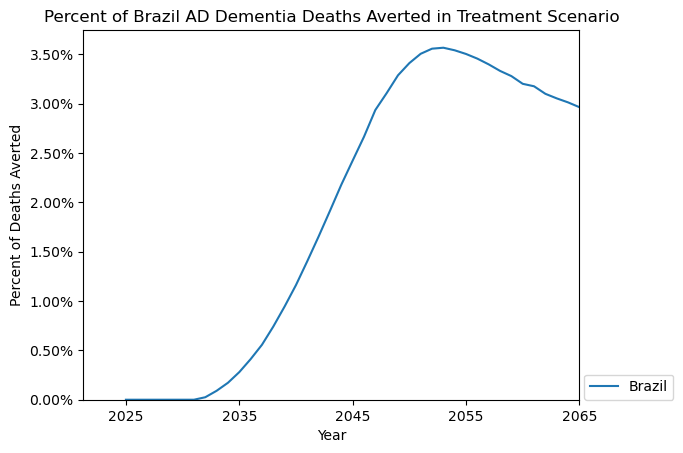

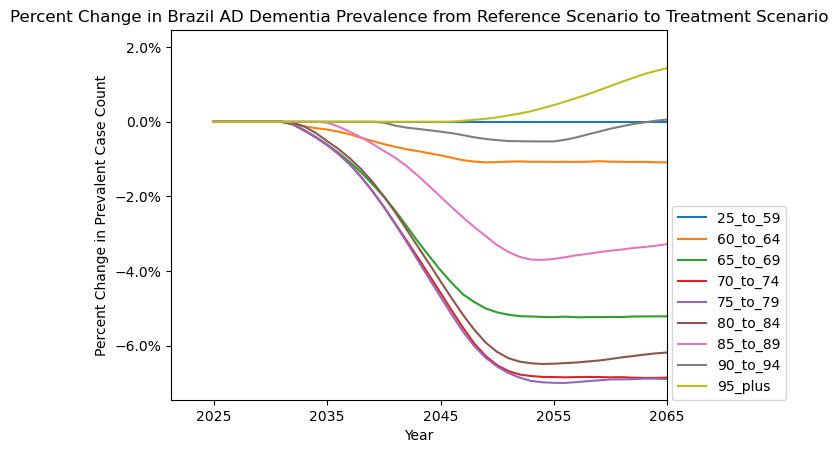

<Figure size 640x480 with 0 Axes>

In [329]:
averted = filter_results(
    res3,
    ["Year"],
    location=["Brazil"],
    measure=[
        "Averted Deaths Associated with AD",
    ],
    scenario=["BBBM Testing and Treatment"],
).drop(["Scenario", "Measure", "95% UI Lower", "95% UI Upper"], axis=1)
averted = averted.set_index(list(averted.columns.difference(["Mean"], sort=False)))
total = filter_results(
    res,
    ["Year"],
    location=["Brazil"],
    measure=["Deaths Associated with AD"],
).drop(["Scenario", "Measure", "95% UI Lower", "95% UI Upper"], axis=1)
total = total.set_index(list(total.columns.difference(["Mean"], sort=False)))
make_forecast_plot(
    (averted / total).reset_index(),
    "Percent of Brazil AD Dementia Deaths Averted in Treatment Scenario",
    "Percent of Deaths Averted",
    "Location",
    percent=True,
)
prev = filter_results(
    res,
    ["Year", "Age"],
    location=["Brazil"],
    stage=["AD Dementia"],
    measure=["Prevalence"],
).drop(["Scenario", "95% UI Lower", "95% UI Upper"], axis=1)
prev = prev.set_index(list(prev.columns.difference(["Mean"], sort=False)))

change = filter_results(
    res,
    ["Year", "Age", "Scenario"],
    location=["Brazil"],
    stage=["AD Dementia"],
    measure=["Prevalence"],
    scenario=["Reference", "BBBM Testing and Treatment"],
)
change = change.set_index(
    list(change.columns.difference(["Mean", "95% UI Lower", "95% UI Upper"]))
).unstack("Scenario")

for x in ["Mean", "95% UI Lower", "95% UI Upper"]:
    change[(x, "Difference")] = (
        change[(x, "BBBM Testing and Treatment")] - change[(x, "Reference")]
    )
    change = change.drop(
        [(x, "BBBM Testing and Treatment"), (x, "Reference")],
        axis=1,
    )
change = (
    change.droplevel("Scenario", axis=1)
    .reset_index()
    .drop(["95% UI Lower", "95% UI Upper"], axis=1)
)
change = change.set_index(list(change.columns.difference(["Mean"], sort=False)))

display((change / prev).reset_index())
make_forecast_plot(
    (change / prev).reset_index(),
    "Percent Change in Brazil AD Dementia Prevalence from Reference Scenario to Treatment Scenario",
    "Percent Change in Prevalent Case Count",
    "Age",
    percent=True,
)

Age Disease Stage Location     Measure  Metric  Year      Mean
0    25_to_59   AD Dementia    Japan  Prevalence  Number  2025  0.000000
1    25_to_59   AD Dementia    Japan  Prevalence  Number  2026  0.000000
2    25_to_59   AD Dementia    Japan  Prevalence  Number  2027  0.000000
3    25_to_59   AD Dementia    Japan  Prevalence  Number  2028  0.000000
4    25_to_59   AD Dementia    Japan  Prevalence  Number  2029  0.000000
..        ...           ...      ...         ...     ...   ...       ...
679   95_plus   AD Dementia    Japan  Prevalence  Number  2096  0.022440
680   95_plus   AD Dementia    Japan  Prevalence  Number  2097  0.022323
681   95_plus   AD Dementia    Japan  Prevalence  Number  2098  0.022336
682   95_plus   AD Dementia    Japan  Prevalence  Number  2099  0.022449
683   95_plus   AD Dementia    Japan  Prevalence  Number  2100  0.022474

[684 rows x 7 columns]

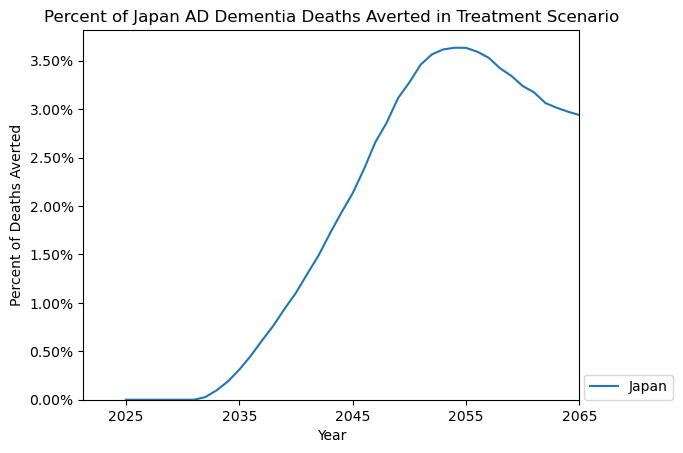

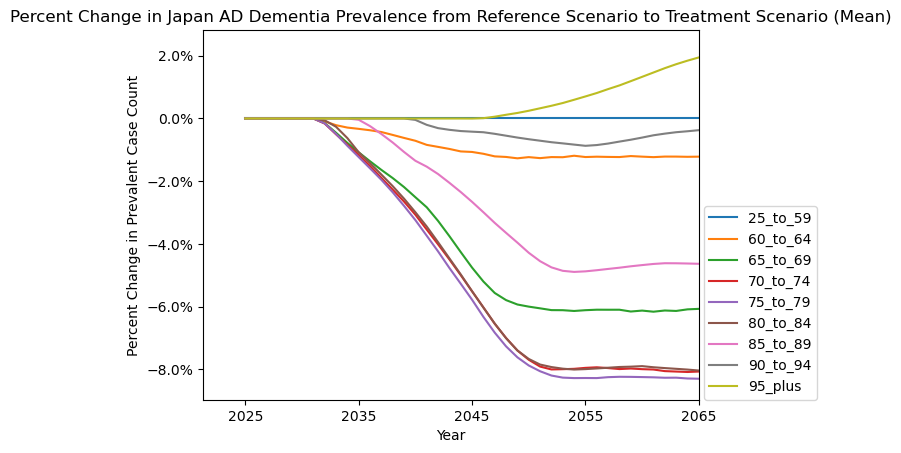

<Figure size 640x480 with 0 Axes>

In [328]:
averted = filter_results(
    res3,
    ["Year"],
    location=["Japan"],
    measure=[
        "Averted Deaths Associated with AD",
    ],
    scenario=["BBBM Testing and Treatment"],
).drop(["Scenario", "Measure", "95% UI Lower", "95% UI Upper"], axis=1)
averted = averted.set_index(list(averted.columns.difference(["Mean"], sort=False)))
total = filter_results(
    res,
    ["Year"],
    location=["Japan"],
    measure=["Deaths Associated with AD"],
).drop(["Scenario", "Measure", "95% UI Lower", "95% UI Upper"], axis=1)
total = total.set_index(list(total.columns.difference(["Mean"], sort=False)))
make_forecast_plot(
    (averted / total).reset_index(),
    "Percent of Japan AD Dementia Deaths Averted in Treatment Scenario",
    "Percent of Deaths Averted",
    "Location",
    percent=True,
)
prev = filter_results(
    res,
    ["Year", "Age"],
    location=["Japan"],
    stage=["AD Dementia"],
    measure=["Prevalence"],
).drop(["Scenario", "95% UI Lower", "95% UI Upper"], axis=1)
prev = prev.set_index(list(prev.columns.difference(["Mean"], sort=False)))

change = filter_results(
    res,
    ["Year", "Age", "Scenario"],
    location=["Japan"],
    stage=["AD Dementia"],
    measure=["Prevalence"],
    scenario=["Reference", "BBBM Testing and Treatment"],
)
change = change.set_index(
    list(change.columns.difference(["Mean", "95% UI Lower", "95% UI Upper"]))
).unstack("Scenario")

for x in ["Mean", "95% UI Lower", "95% UI Upper"]:
    change[(x, "Difference")] = (
        change[(x, "BBBM Testing and Treatment")] - change[(x, "Reference")]
    )
    change = change.drop(
        [(x, "BBBM Testing and Treatment"), (x, "Reference")],
        axis=1,
    )
change = (
    change.droplevel("Scenario", axis=1)
    .reset_index()
    .drop(["95% UI Lower", "95% UI Upper"], axis=1)
)
change = change.set_index(list(change.columns.difference(["Mean"], sort=False)))

display((change / prev).reset_index())
make_forecast_plot(
    (change / prev).reset_index(),
    "Percent Change in Japan AD Dementia Prevalence from Reference Scenario to Treatment Scenario (Mean)",
    "Percent Change in Prevalent Case Count",
    "Age",
    percent=True,
)